<a href="https://colab.research.google.com/github/srodriguez5500/ReCell/blob/main/ReCell_Project_FullCode_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.2.2 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#read and manipulate data
import numpy as np
import pandas as pd


#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#build linear regression model
import statsmodels.api as sm

#split data into train and test sets
from sklearn.model_selection import train_test_split

#evaluate model performance
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Adjust spacing on subplots
from matplotlib.pyplot import subplots_adjust

#turn off future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#import statistical functions
from scipy import stats

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data set
df = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 3 - ReCell; Linear Regressions/used_device_data.csv')

In [ ]:
#make a copy of data frame to preserve original values
df2 = df.copy()

## Data Overview

- Observations
- Sanity checks

###Observations on first/last 5 rows and shape:

In [ ]:
#view first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#view last 5 rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
#shape
print('There are ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns in the data set.')

There are 3454 rows and 15 columns in the data set.


- Some information seems to be missing from main_camera_mp
- release_year shown are from 2018-2020
- normalized_used_price and normalized_new_price is in euros
- There are 3454 observations and 15 predictors in the dataset.

###Data Types

In [ ]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- There are missing values in several columns including:
  - main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight
- Predictors with the data type object include: brand_name, os, 4g and 5g
- The majority of the predictors have a data type of float 64. These include:
  - screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, normalized_used_price and normalized_new_price
- Predictors with a data type int64 are release_year and days_used

###Statistical Summary

In [ ]:
#statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 34 different brands, including "Others".
- There are 4 different "os" types, with the majority being Android.
- 75% of the screen sizes range from ~ 5 - 15 cm
- ~ 68% of the observations have 4G network availability.
- ~ 96% of the observations do NOT have 5G network availability.
- Main_camera_mp have missing values
  - It seems outliers may be present in the data, given that the range is 0.08 - 48 mp with mean = 9.46 and median = 8.
- Similarly, selfie_camera_mp may have outliers in the data, given that the range is from 0 - 32 mp with a mean = 6.5 and median = 5.
- Int_memory ranges from 0.01 - 1024 GB
- Ram ranges from 0.02 - 12 GB
- Weight ranges from 69 - 855 grams
- Battery ranges from 500 - 9720 mAh
- Release year ranges from 2013 - 2020
- Days used range from 31 - 1094 days.
- Normalized used price ranges from 1.54 - 6.62 euros
- Normalized new price ranges from 2.90 - 7.85 euros
  - Normalized new and used prices have similar ranges.

###Null values and duplicate detection

In [ ]:
#detect null values
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [ ]:
 #detect duplicates
df.duplicated().sum()

0

- There are null values in the following columns:
  - main_cam_mp, selfi_cam_mp, int_memory, ram, battery, and weight
  - We will impute these after further exploring variables.
- The number of null values are relatively low in reference to the amount of observations present.
- There are no duplicated entries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device? .corr?

### **Univariate Analysis**

####**We will begin by exploring numerical predictors.**
- First we will create a user defined function that will generate a boxplot and histogram simultaneously, given a data frame and a predictor.

In [ ]:
#define a function that plots a box plot and a histogram simultaneously and will display median and mean
def plot_box_hist(df, predictor, title='Boxplot and Histogram'):

  #calculate mean and median
  mean = df[predictor].mean()
  median = df[predictor].median()

  #set figure size
  plt.figure(figsize=(8,10))

  #create a boxplot at the top
  plt.subplot(2,1,1) #placement of the boxplot will be first
  sns.boxplot(data=df,x=predictor)
  plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
  plt.legend()

  #create a histogram below boxplot
  plt.subplot(2,1,2)
  sns.histplot(data=df, x=predictor, kde=True)
  plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
  plt.legend()

  #add overall title
  plt.suptitle(title, fontsize=16)

  #Adjust the spacing here
  subplots_adjust(top=0.9)  # Adjust the value as needed

  # Adjust layout to prevent overlapping of elements
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


  #show plot
  plt.show();

####**Observations on screen size**

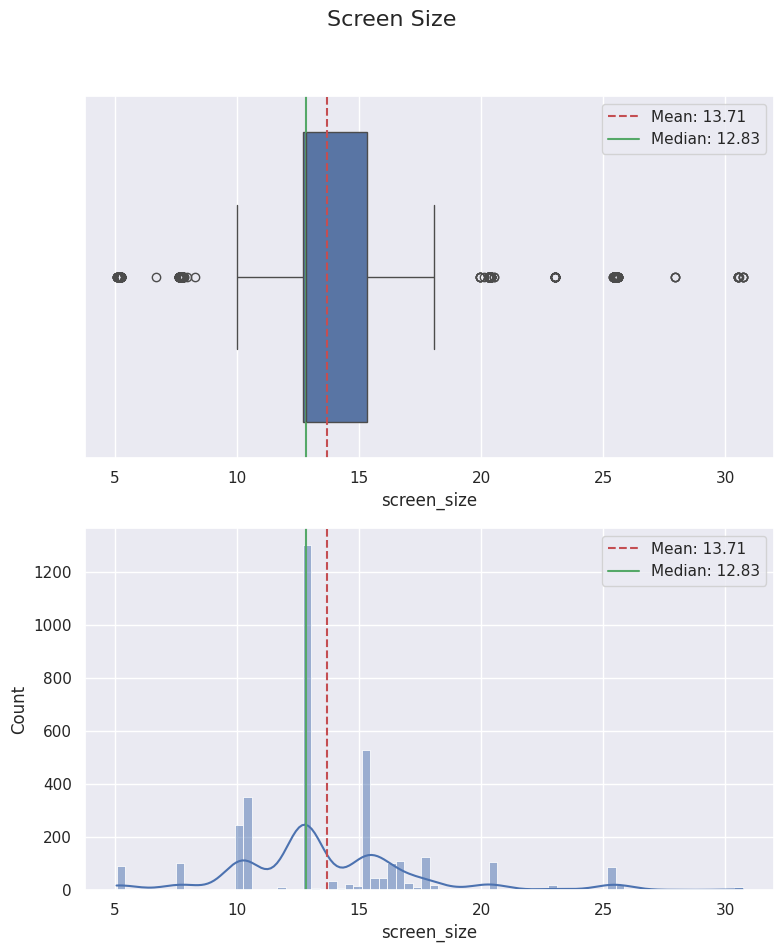

In [ ]:
plot_box_hist(df,'screen_size', title='Screen Size');

In [ ]:
df['screen_size'].mode()

,screen_size
0,12.7


- Screen size has a broad spread ranging from ~5cm - ~30 cm
- There are many outliers in the data but varying screen sizes is not unusual since the data set contains phones and tablets.
- The most observed screen size is 12.7 cm.

####**Observations on 'main_camera_mp'**

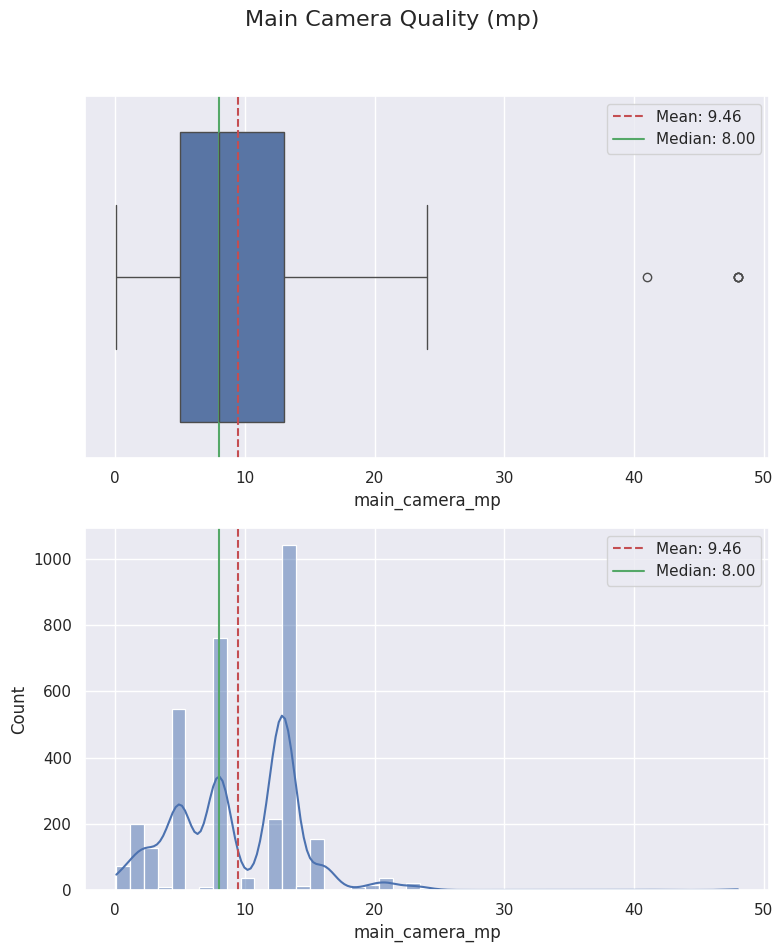

In [ ]:
plot_box_hist(df, 'main_camera_mp', title='Main Camera Quality (mp)')

In [ ]:
df['main_camera_mp'].mode()

,main_camera_mp
0,13.0


- The main_camera_mp ranges from 0.08 - 48 mp
- The most observed quality for main camera is 13 mp.

####**Observations on 'selfie_camera_mp'**

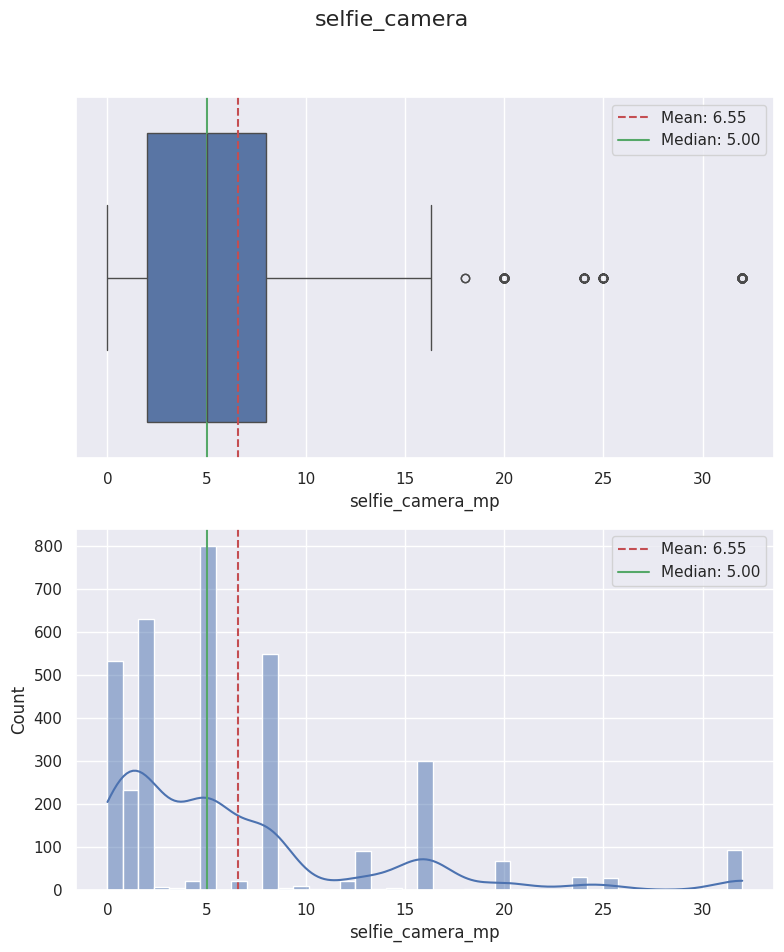

In [ ]:
plot_box_hist(df,'selfie_camera_mp', title='selfie_camera')

- Outliers exist for selfie_camera_mp but it is not unsual to see a wide range for this.
- Selfie_camera_mp ranges from 0 - 32 mp

####**Observations on 'int_memory'**

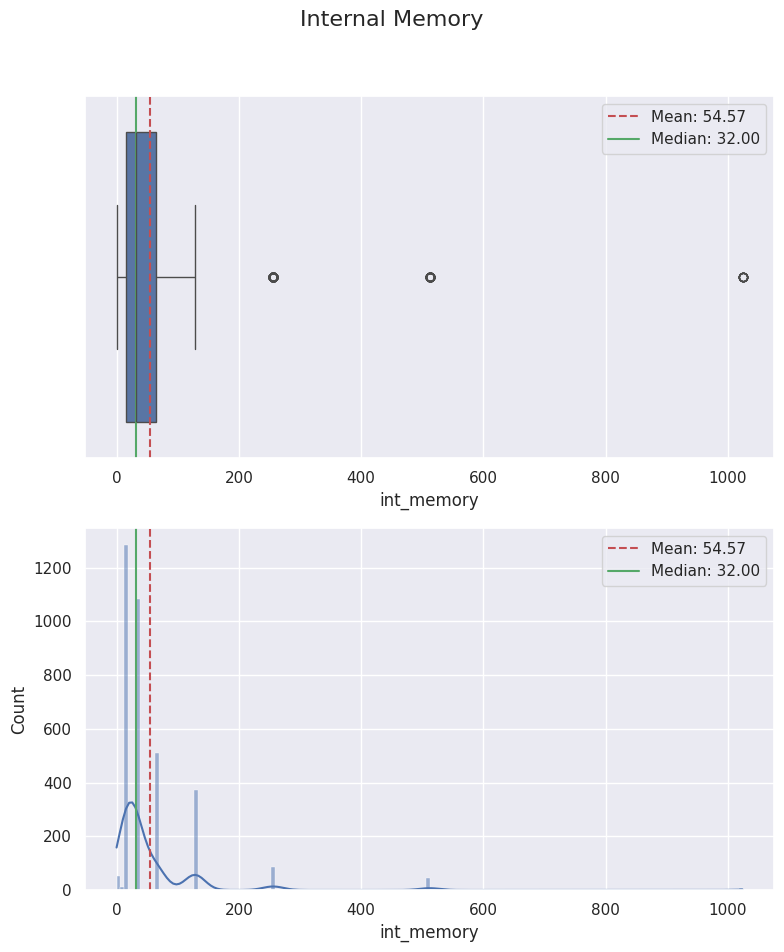

In [ ]:
plot_box_hist(df,'int_memory', title='Internal Memory')

- 75% of internal memory ranges from 0.01 - 64 GB
- The max value for internal memory is 1024 GB
- Data is heavily right skewed
- Outliers are not unusual

####**Observations on 'ram'**

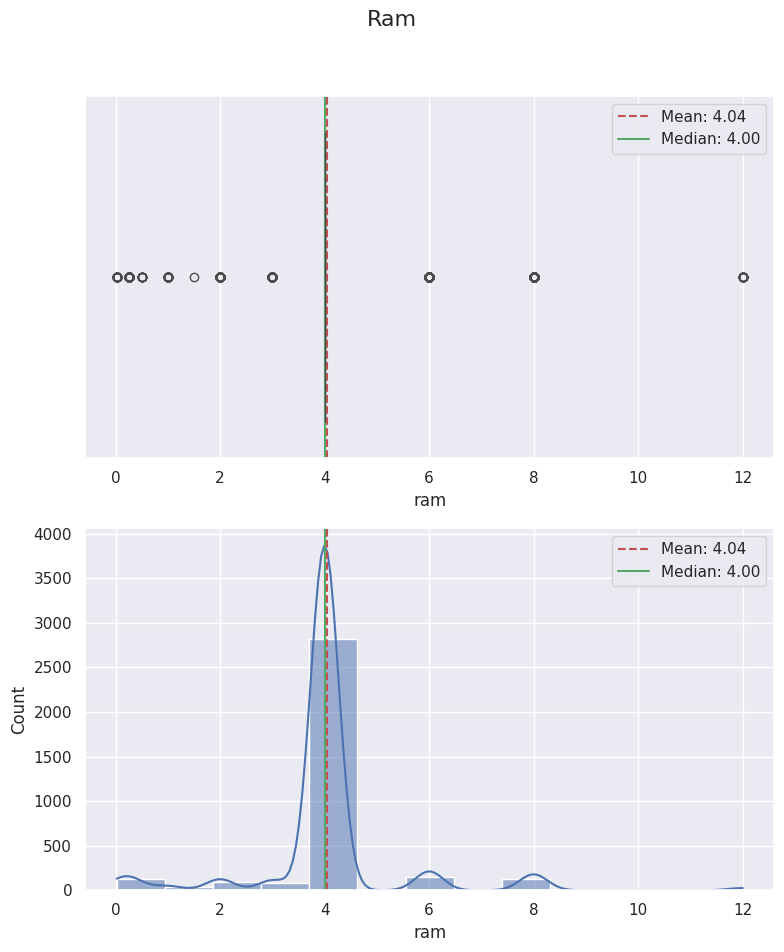

In [ ]:
plot_box_hist(df,'ram', title='Ram')

- Most observations have a ram value of 4 GB
- Outliers are not unusual

####**Observations on 'battery'**

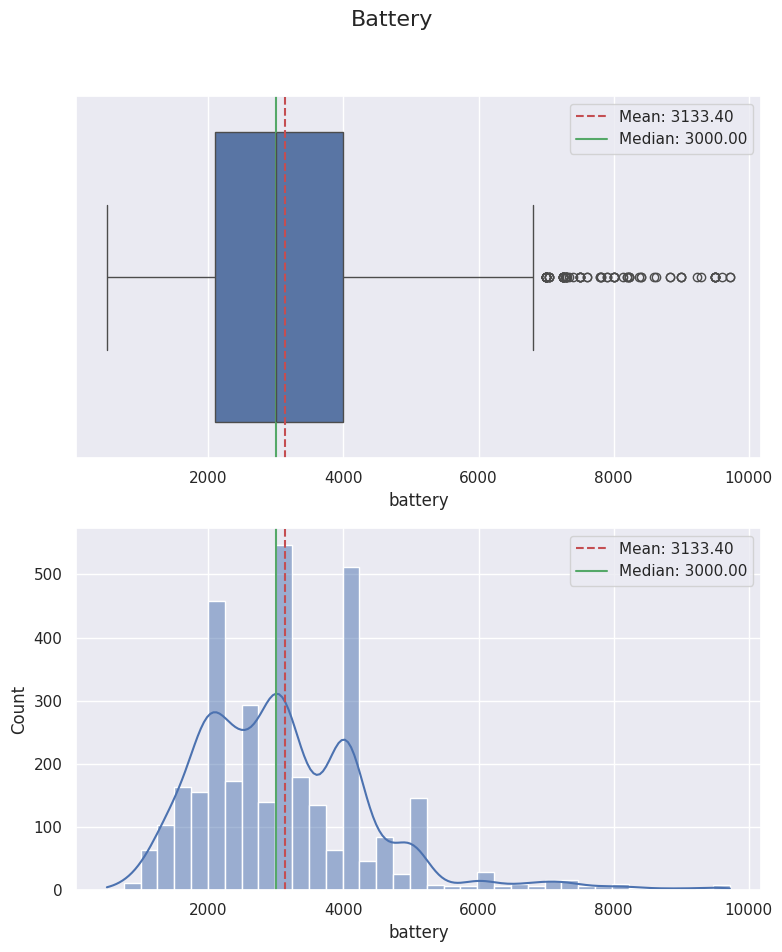

In [ ]:
plot_box_hist(df,'battery', title='Battery')

- The data is right skewed
- Mean, median and mode are around 3000 mAh for energy capacity
- The energy capacity for the observations ranges from 500 - 9720 mAh
- Outliers are not unusual

####**Observation on 'weight'**

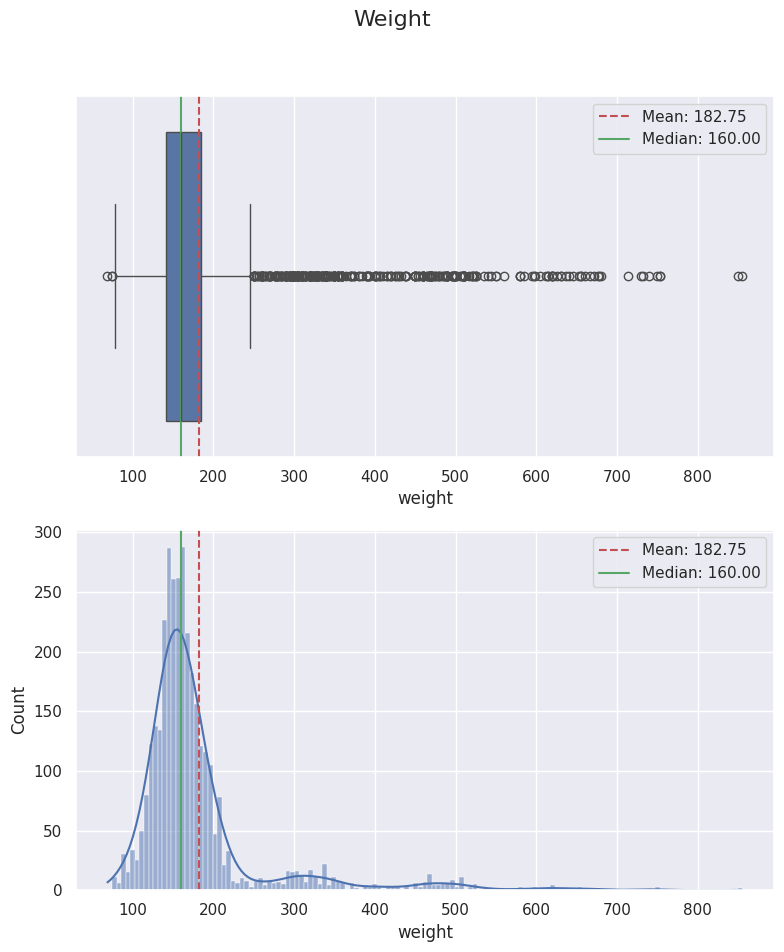

In [ ]:
plot_box_hist(df,'weight', title='Weight')

- There are many outliers but this is expected since tablets and phones have a broad range of weights.
- The presence of this many outliers may hinder the effectiveness of the model.
- The data for weight is heavily right skewed.
- The data ranges from 69 - 855 grams.


####**Observations on 'days_used'**

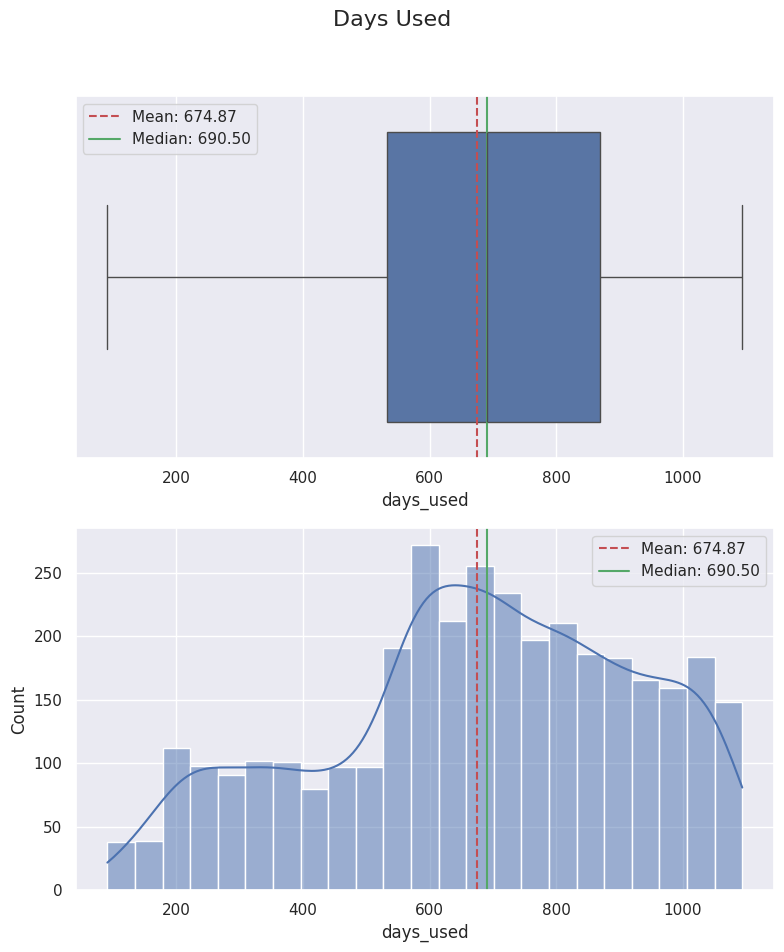

In [ ]:
plot_box_hist(df,'days_used', title='Days Used')

- Days used range from 91 - 1094 days
- The data is slightly left skewed
- No outliers are displayed in the boxplot

####**Observations on 'normalized_new_price'**

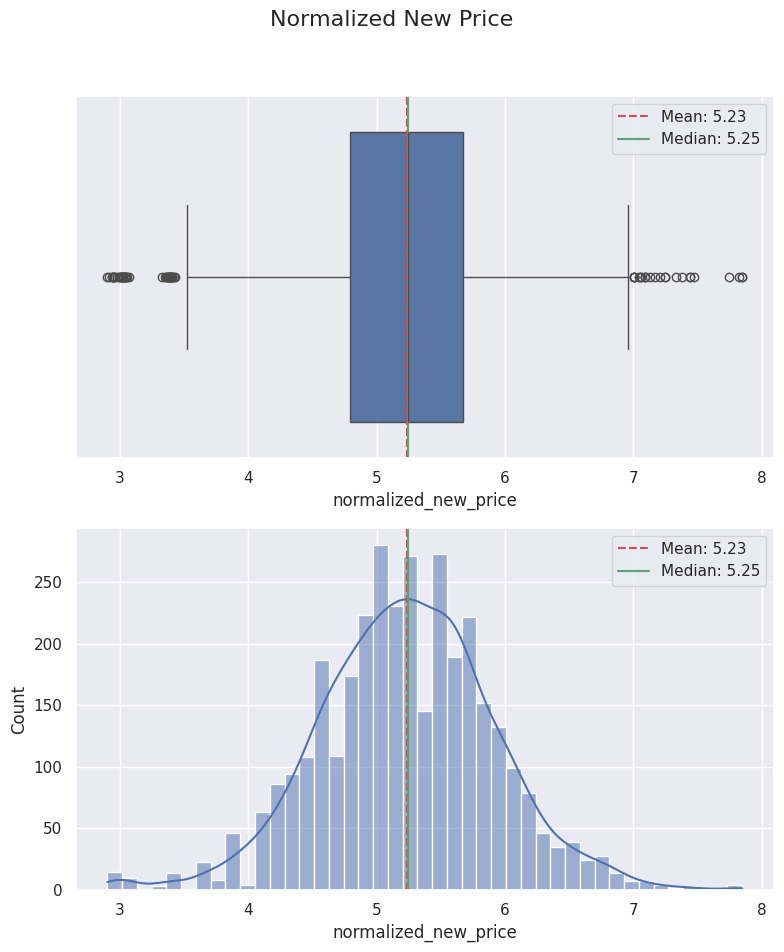

In [ ]:
plot_box_hist(df,'normalized_new_price', title='Normalized New Price');

- The data follows a normal distribution
- Normalized new price in euros ranges from 2.9 - 7.8
- Outliers exist

####**Observations on 'normalized_used_price'**

  **What does the distribution of normalized used device prices look like? (Question 1)**




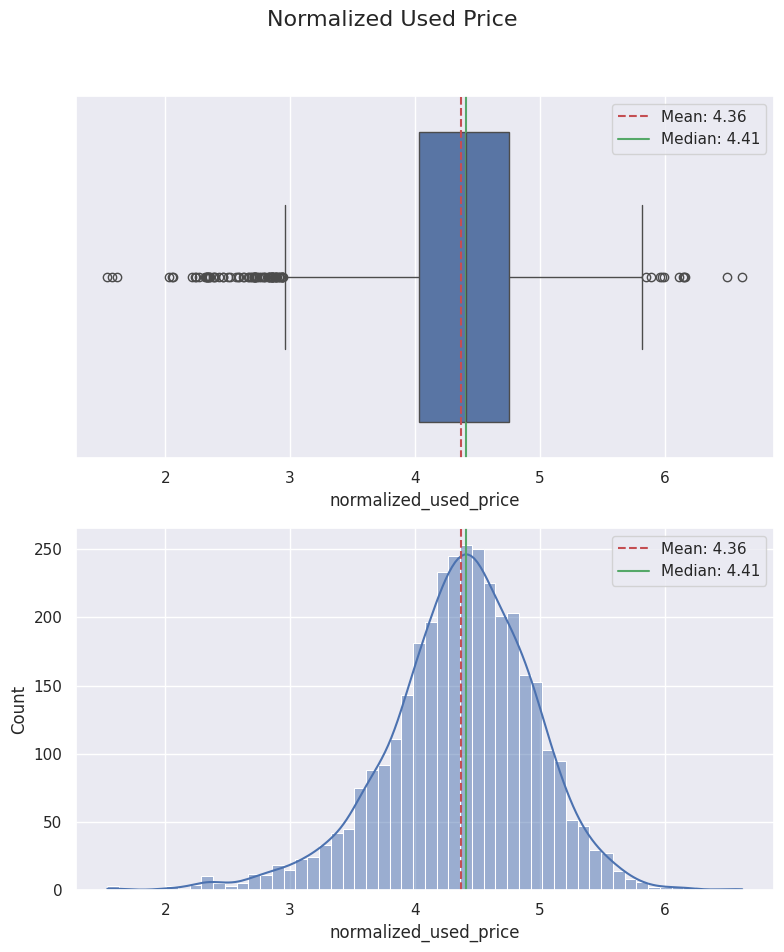

In [ ]:
plot_box_hist(df,'normalized_used_price', title='Normalized Used Price');

- The distribution for normalized used prices in euros follows a normal distribution pretty closely.
- The data has a long left tail.
- Normalized used price in euros ranges from 1.53 - 6.61

####**We will now explore categorical data.**
- First, we will create a user defined function that will generate a countplot with parameters: df and predictor
- Then, we will create a user defined function that will generate a pie chart with parameters: df and predictor

In [ ]:
#create a user defined function that will generate a countplot for categorical data
def plot_count(df, predictor, title = 'Count Plot'):

  #set plot size
  plt.figure(figsize=(8,6))

  #create the count plot
  sns.countplot(data=df, x=predictor, hue=predictor)
  plt.xticks(rotation=90)

  #add title
  plt.title(title, fontsize=16)

  #label axes
  plt.xlabel(predictor, fontsize=14)
  plt.ylabel('Count', fontsize=14)

  #show the plot
  plt.show()

In [ ]:
#create a user defined function that will generate a pie chart for a particular column in the data frame
def pie_chart(df, predictor, title='Pie Chart'):

  #get value counts and respective labels
  counts = df[predictor].value_counts()
  labels = counts.index

  #generate pie chart
  plt.pie(counts, labels=labels, autopct='%.2f%%', startangle=90, colors=sns.color_palette('Set3', len(counts)))

  #Ensure circular form
  plt.axis('equal')

  #add title
  plt.title(title, fontsize=16)

  #display plot
  plt.show();

In [ ]:
def pie_chart(df, predictor, title='Pie Chart'):
  #pull value counts for particular column
  filtered = df[predictor].value_counts(dropna=False).plot(kind='pie',autopct='%.2f%%', title=title, legend=True, pctdistance=1.25, labeldistance=None, ylabel='');
  filtered.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

####**Observations on 'brand_name'**

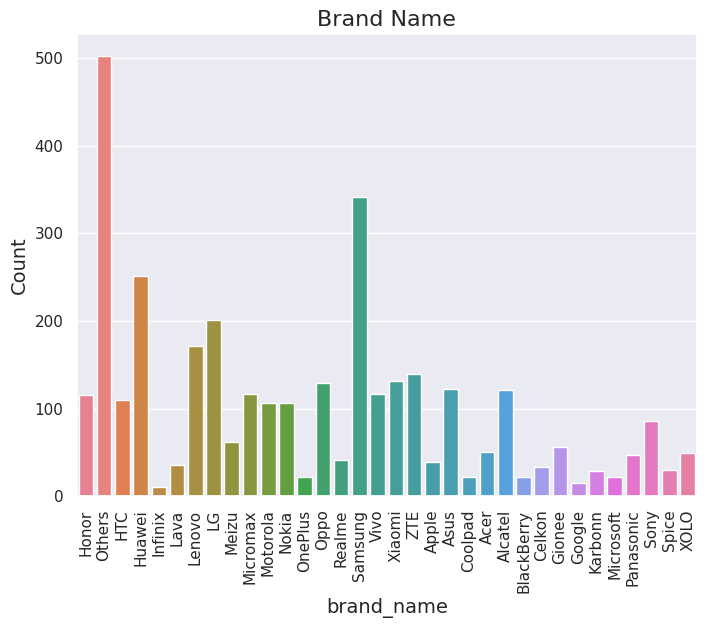

In [ ]:
plot_count(df,'brand_name',title='Brand Name')

- The majority of the data falls under the umbrella brand "Others." This may distort the relationship between brand_name and normalized_used_price of a device
- The second highest percentage of a brand is Samsung.
- There are 34 different brand names.

####**Observations on 'os'**


**What percentage of the used device market is dominated by Android devices? (Question 2)**

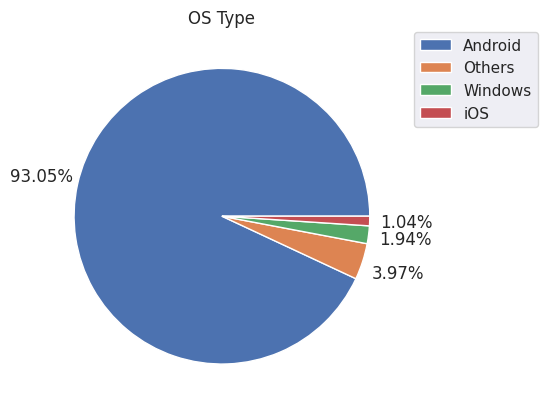

In [ ]:
pie_chart(df, 'os', title='OS Type')

- 93.05% of the observed used devices have an Android operating system. **(Question 2)**

####**Observations on '4g'**

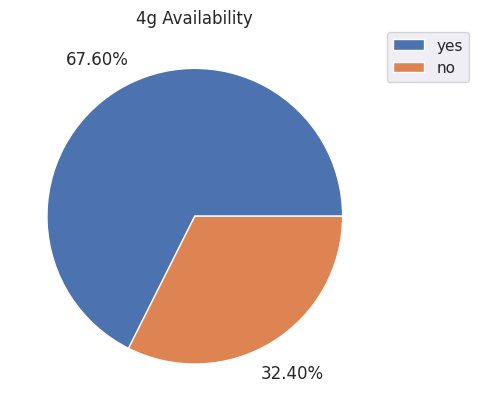

In [ ]:
pie_chart(df, '4g', title='4g Availability')

- 67.60% of the observed devices have 4g networks available.

####**Observations on '5g'**

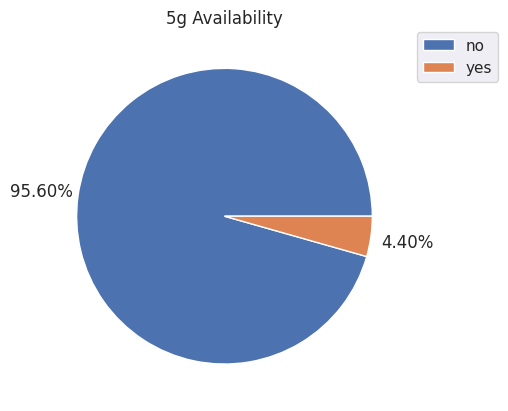

In [ ]:
pie_chart(df, '5g', title='5g Availability')

- 95.6% of the observed devices do not have 5g availability.

####**Observations on 'release_year'**

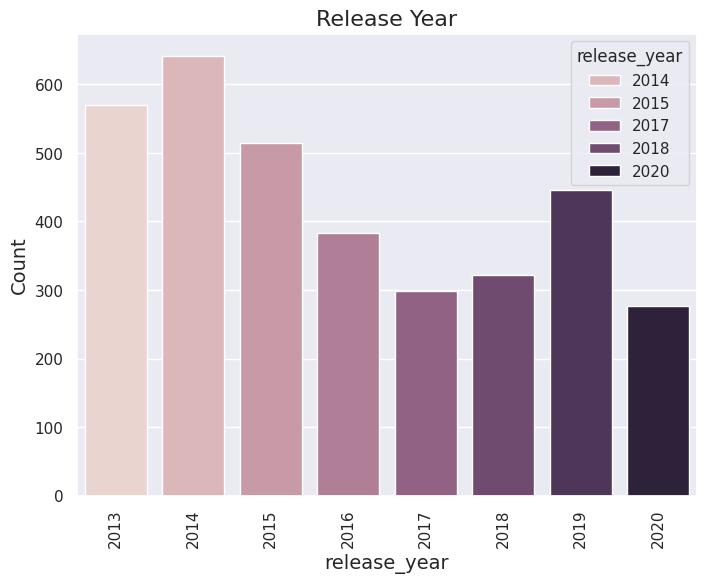

In [ ]:
plot_count(df,'release_year',title='Release Year')

- Observations on release_year range from 2013 - 2020

### **Bivariate Analysis**

####**Which attributes are highly correlated with normalized price of a used device? (Question 7)**

####**We will plot a correlation heatmap for numerical columns.**

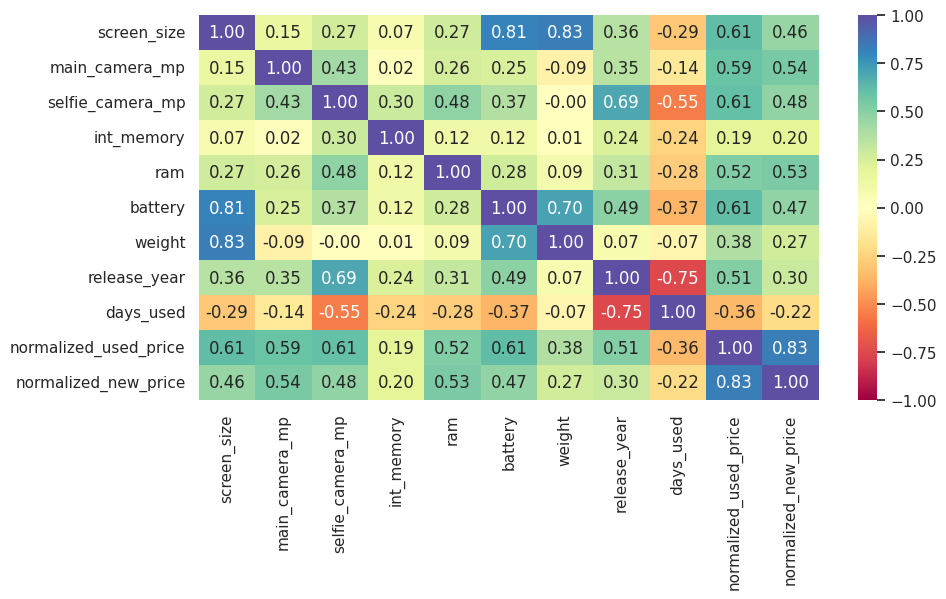

In [ ]:
#create a heatmap for numerical columns only
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Spectral', vmin=-1, vmax=1)
plt.show()

- Predictors with strong positive linear relationships include:
  - Battery and screen size (0.81).
  - Weight and screen size (0.83)
  - Release year and selfie camera megapixels (0.69)
  - Normalized used price and normalized new price (as expected; 0.83) **(Question 7)**
- Predictors with slightly strong positive linear relationships with normalized used price include **(Question 7)**:
  - Screen size (0.61), main camera mp (0.59), selfie camera mp (0.61), and battery (0.61)
- Released year and days used have a strong negative linear relationship (-0.75), as expected

####**We will generate boxplots for the categorical predictors as they relate to the target variable (normalized used price).**

####**Normalized used price and 'brand_name'**

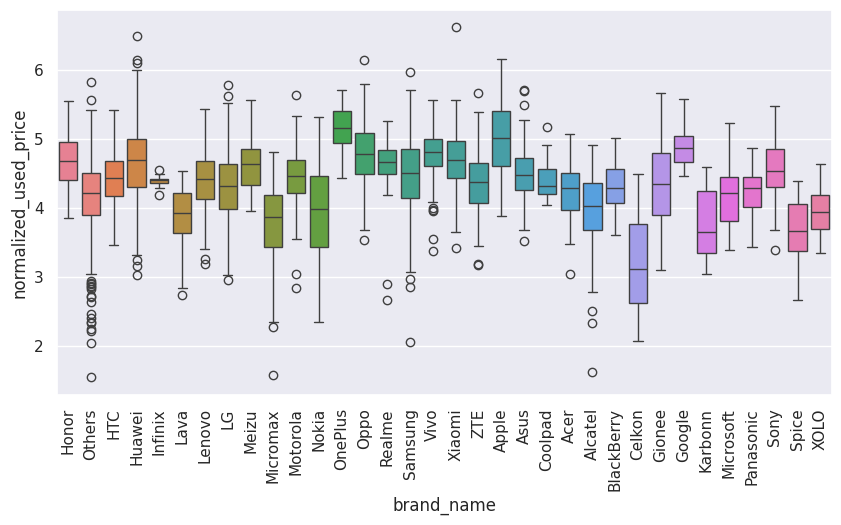

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price', hue='brand_name')
plt.xticks(rotation=90);

- Brand name seems to be a strong predictor of normalized used price. However, the presence of several outliers in the "Others" brand may distort the relationship. **(Question 7)**
- Apple is on the higher end of normalized used price while Celkon is on the lower end.
- There are many outliers present, but they do not seem unusual since prices can vary within a single brand.

####**Normalized used price and 'os'**

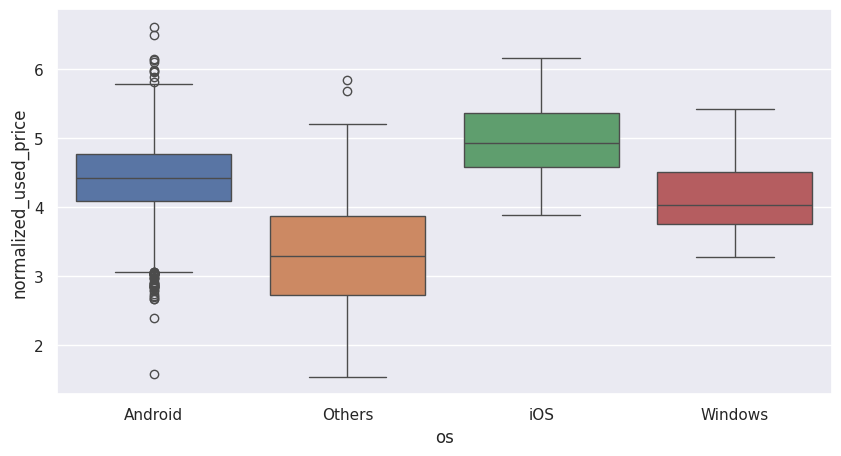

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='os', y='normalized_used_price', hue='os');

- Operating systems may be a strong predictor of normalized used price. **(Question 7)**
- iOS seems to be on the higher end, correspondent to what we discovered previously
- Many outliers exist for the Android operating system.

####**Normalized used price and '4g'**

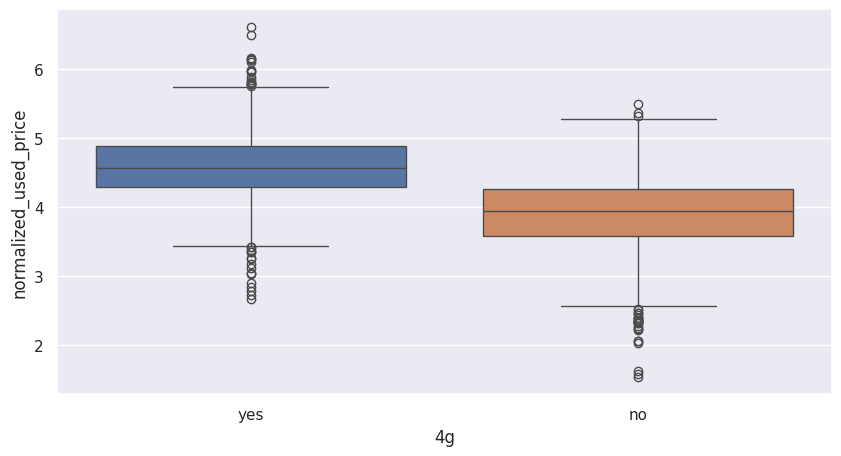

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='4g', y='normalized_used_price', hue='4g');

- The availability of 4g does not seem to be a good predictor of normalized used price, due to the presence of many outliers.

####**Normalized used price and '5g'**

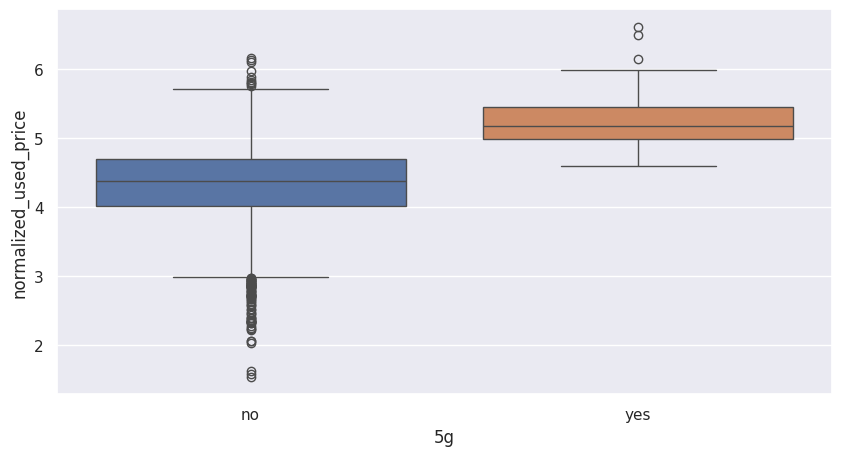

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='5g', y='normalized_used_price', hue='5g');

In [ ]:
#minimum used price of a device with 5g availability
five_g=df[df['5g']=='yes']
five_g['normalized_used_price'].min()

4.602667055769973

- Devices with 5g availability have normalized used prices starting at 4.6 euros.
- Not having 5g availability doesn't seem to have a consistent effect on normalized used price due to the presence of many outliers.

####**Normalized used price and 'release year'**

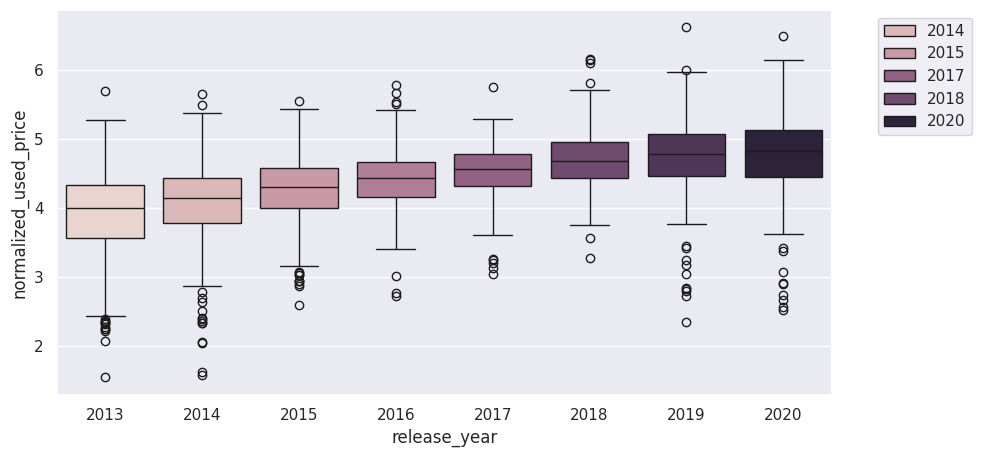

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='release_year', y='normalized_used_price', hue='release_year')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left');

- Generally, normalized used price increases as the release year increases (as expected) **(Question 7)**
- Many outliers exist but this is not unusual.

####**Brand name and main camera mp**

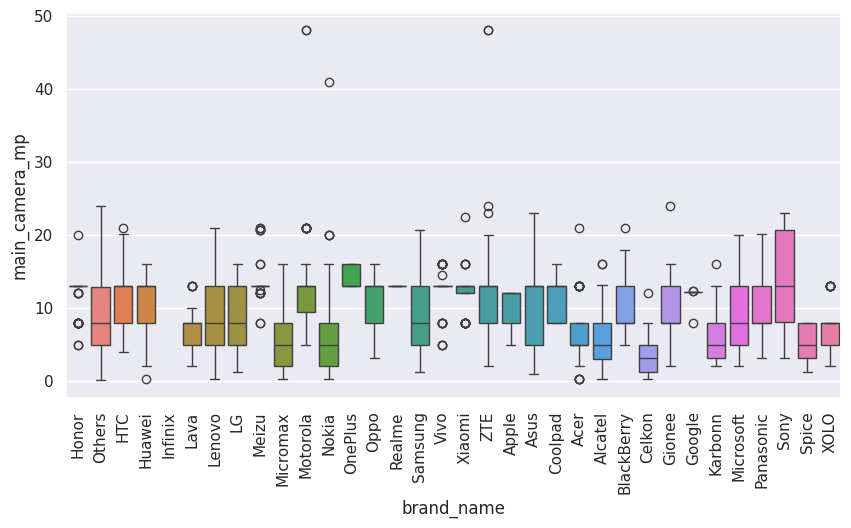

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='brand_name', y='main_camera_mp', hue='brand_name')
plt.xticks(rotation=90);

- Sony has a significantly high main camera quality, in comparison to other brands
- Celkon has the lowest for this category.

####**We will generate scatterplots for numerical and categorical predictors as they relate to the target variable (normalized used price).**

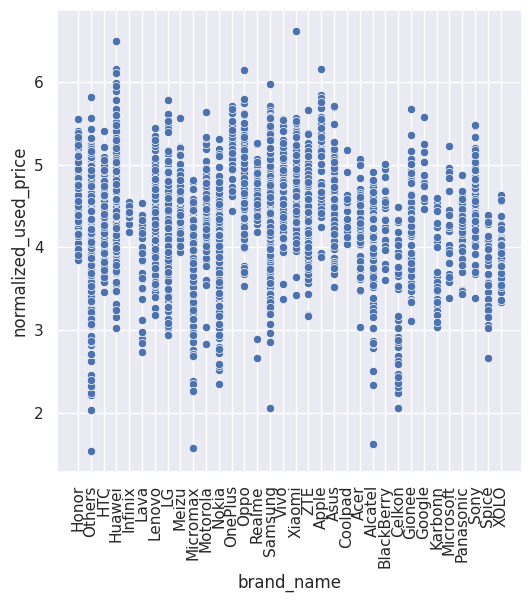

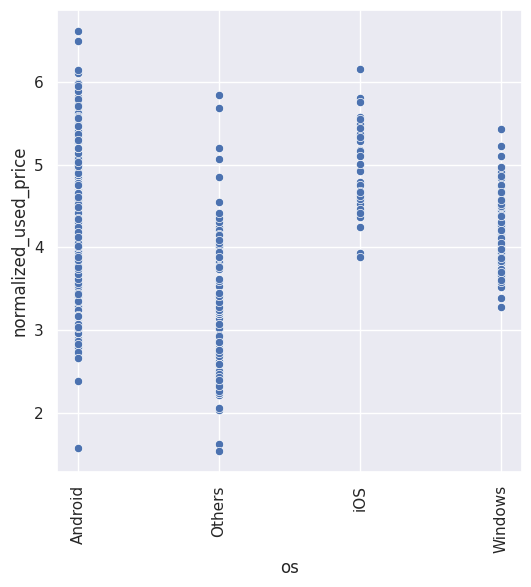

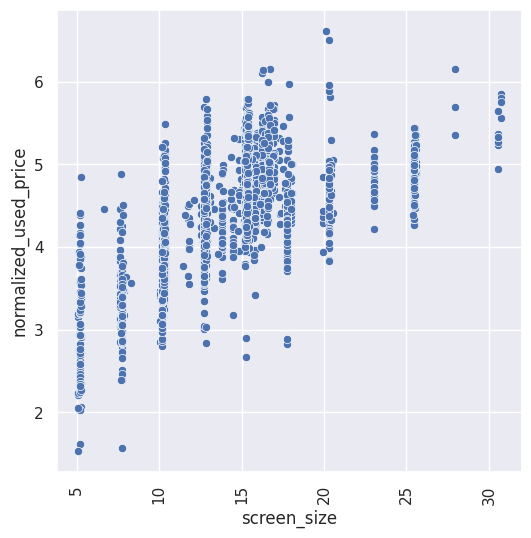

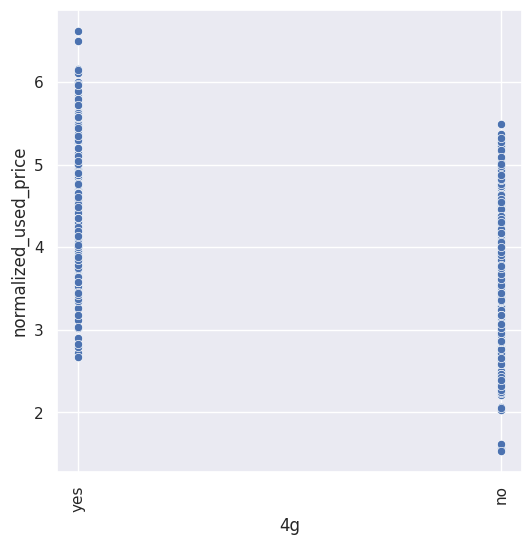

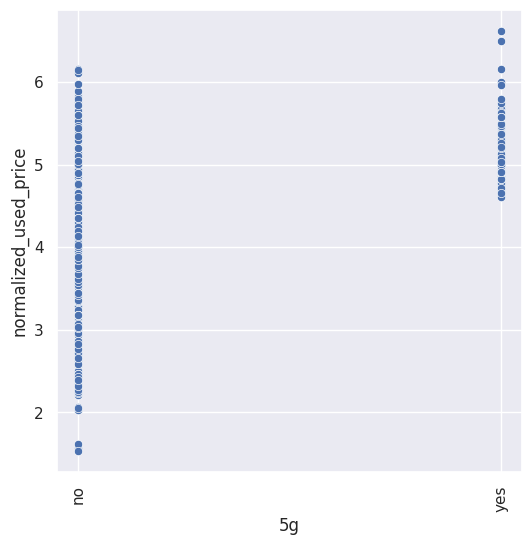

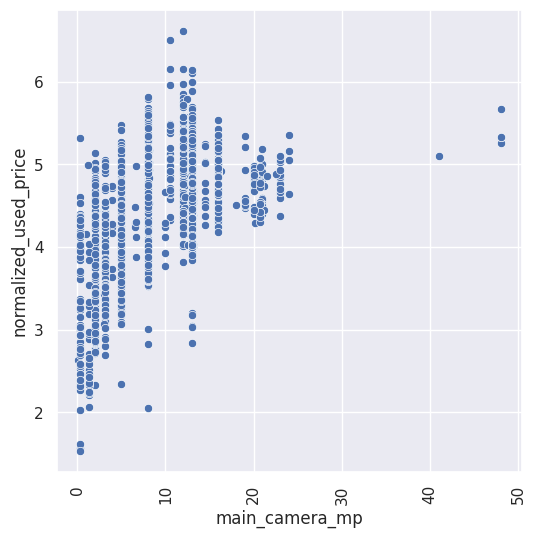

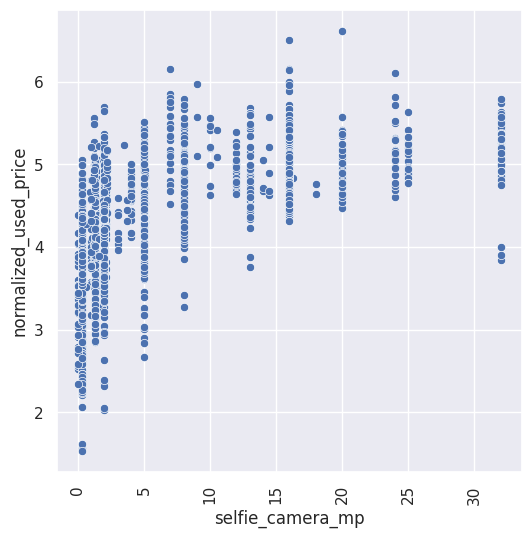

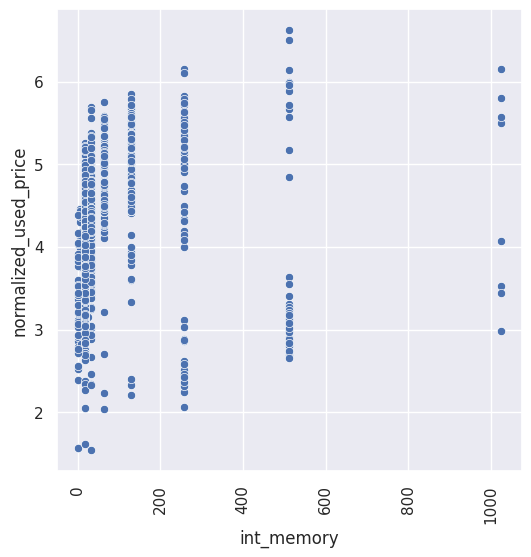

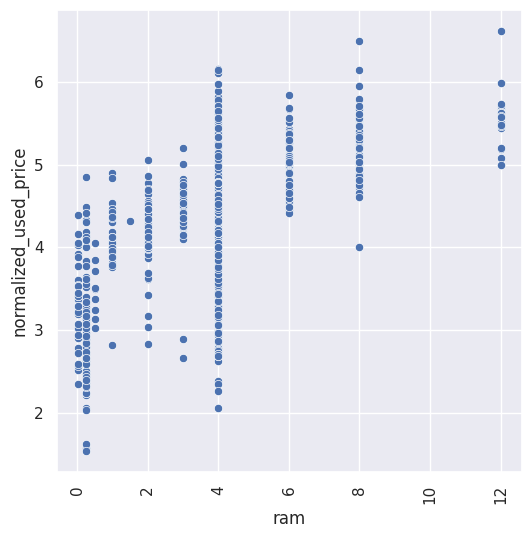

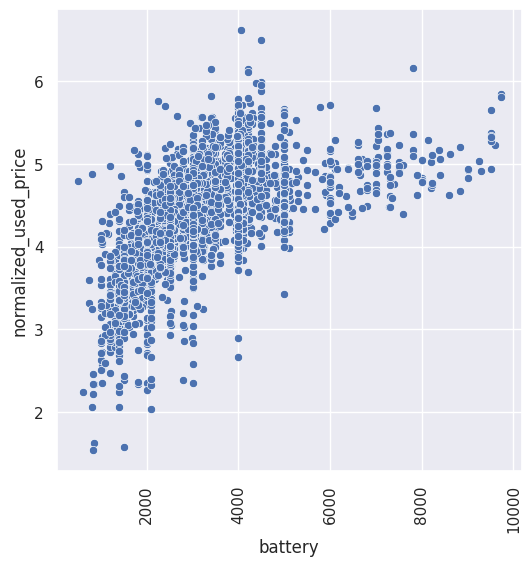

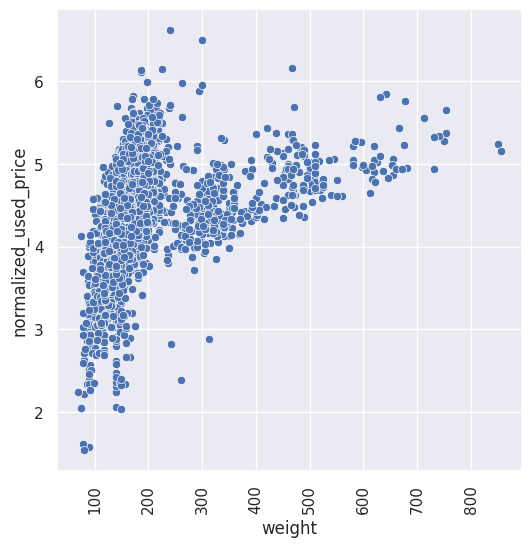

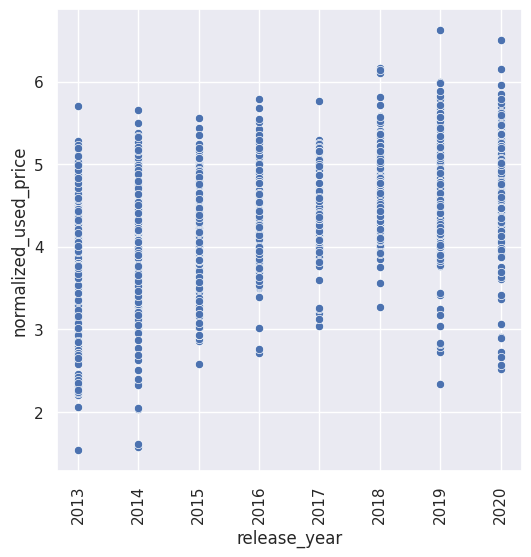

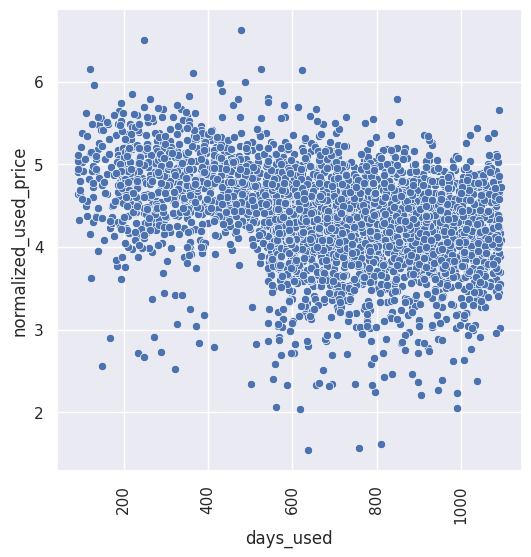

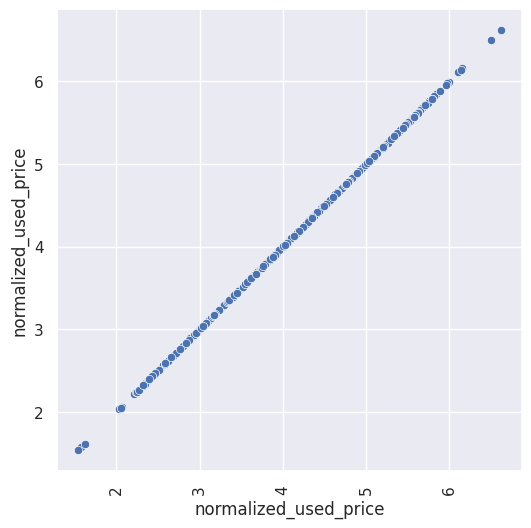

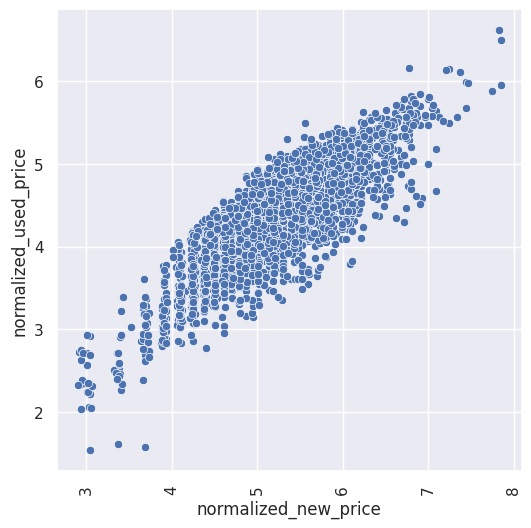

In [ ]:
#plot scatterplots of normalized used price and all features
for i in df.columns:
  plt.figure(figsize=(6,6))
  sns.scatterplot(data=df, x=i, y='normalized_used_price')
  plt.xticks(rotation=90);

- Battery and normalized used price have a slightly strong positive correlation. **(Question 7)**

####**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand? (Question 3)**

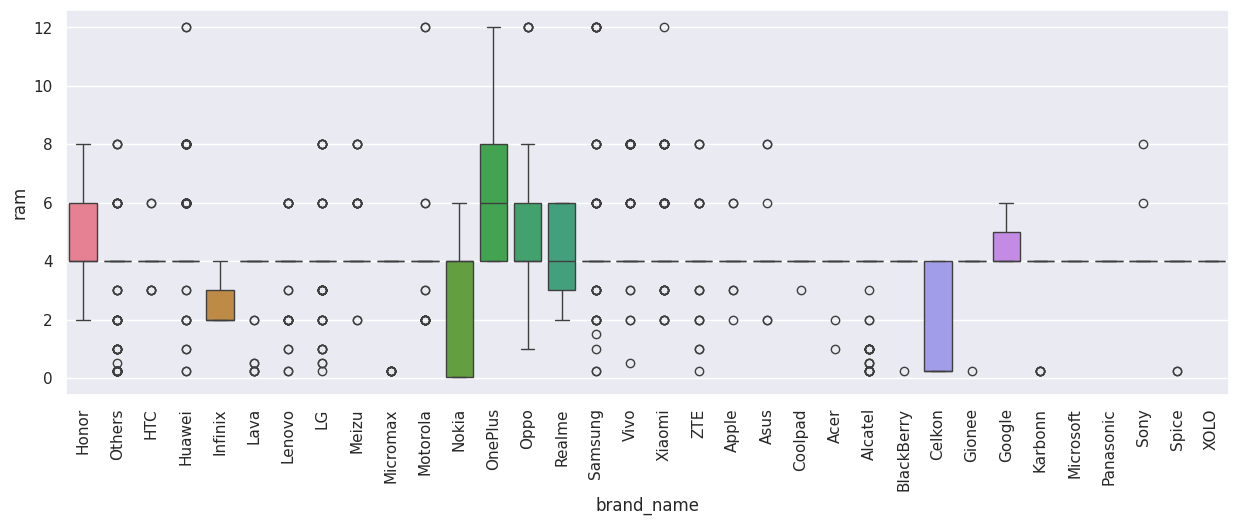

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram", hue='brand_name')
plt.xticks(rotation=90)
plt.show()

- The most common ram capacity across all brands is 4 GB.
- Panasonic, Microsoft and XOLO all have a sole ram capacity of 4 GB.
- The brand "Oneplus" has a wide distribution of ram capacity across its devices.
- Nokia and Celkon have the lowest ram capacity, in comparison to other devices.
- Most brand names have outliers in their data, indicating the existence of varying ram capacities across their devices.

####**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)? (Question 4)**

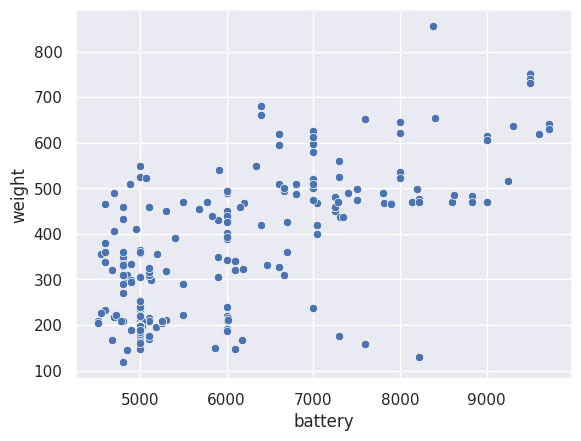

In [ ]:
#filter devices to only include weight > 4500 mAh
filtered_batt = df[df['battery'] > 4500]

#generate boxplot with filtered battery capacity
sns.scatterplot(data=filtered_batt, x='battery', y='weight');

In [ ]:
#generate correlation coefficient between battery and filtered weight > 4500
filtered_batt[['battery', 'weight']].corr()

,battery,weight
battery,1.000000,0.757622
weight,0.757622,1.000000


- In general, as the energy capacity for a device increases, the weight also increases. Thus, there exists a positive linear relationship between the 2 predictors, with a correlation coefficient ~0.76.

####**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?(Question 5)**

In [ ]:
#filter devices to include screen sizes > 6 inches
#Note that 6 in = 15.24 cm
filtered_screen = df[df['screen_size'] > 15.24]

#count how many observations have screen sizes > 6
filtered_screen.shape

(1099, 15)

In [ ]:
#get percentage of brands with screen sizes larger than 6
print('Percentage of brands with screen sizes larger than 6 in: '
      + str((filtered_screen['brand_name'].nunique() / df['brand_name'].nunique() * 100)))

Percentage of brands with screen sizes larger than 6 in: 91.17647058823529


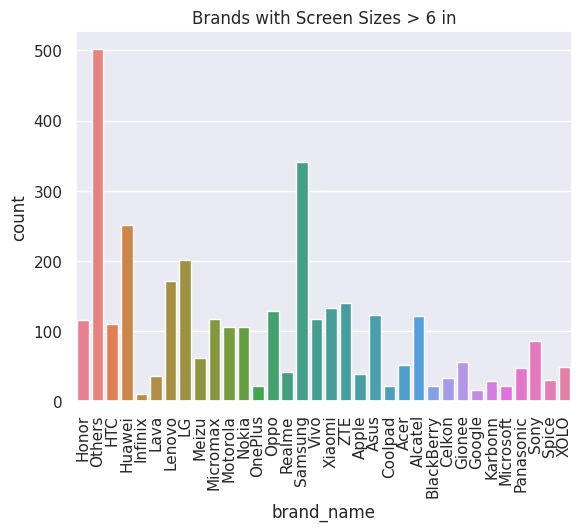

In [ ]:
#generate a countplot displaying brands with filtered screen sizes > 6 in
sns.countplot(data=df, x='brand_name', hue='brand_name')
plt.xticks(rotation=90)
plt.title('Brands with Screen Sizes > 6 in');

- 1099 devices are available across different brands with screen sizes larger than 6 in.
- 91% of all brands offer devices with screen sizes larger than 6 in.
- The brand categories "Others" and "Samsung" have the highest numbers of devices with screen sizes larger than 6 in.

####**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8 MP selfie cameras across brands. (Question 6)**

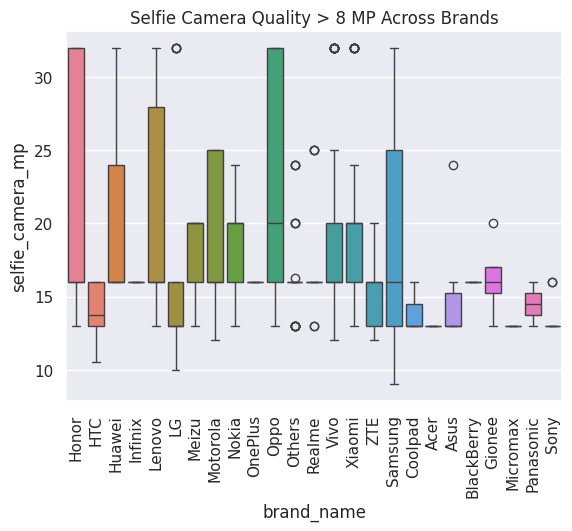

In [ ]:
#filter devices with selfie cameras > 8MP
filtered_selfie = df[df['selfie_camera_mp'] > 8]

#plot boxplot displaying the distribution across brands
sns.boxplot(data=filtered_selfie, x='brand_name', y='selfie_camera_mp', hue='brand_name')
plt.title('Selfie Camera Quality > 8 MP Across Brands')
plt.xticks(rotation=90);

Concerning devices with selfie camera quality > 8, it is observed that:
- Samsung has the widest variety of selfie camera quality, compared to
other brands
- Acer, Micromax and Sony have a very limited variety of such devices with a typical selfie camera quality of 13 MP.
- Honor, Lenovo and Oppo have the same min and max values ranging from about 13 - 32 MP.
- Outliers exist for such devices for some brands and the category "Others"

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###**Missing value treatment**

In [ ]:
#detect null values
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


####**Missing value treatment of 'selfie_camera_mp'**

In [ ]:
#pull null rows for main camera
missing_main_cam = df[df['selfie_camera_mp'].isnull()]
missing_main_cam

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


- It is observed that both models are very similar in all other aspects. We can assume that they will have similar values for selfie_camera_mp.
- Let's further filter our data by main_camera_mp and "os" to find similar models.

In [ ]:
#filter data by "main_camera_mp =12.2"
same_main_cam = df[df['main_camera_mp'] == 12.2]

same_main_cam

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083
1082,Google,Android,12.70,yes,no,12.2,8.0,64.0,4.0,2700.0,143.0,2017,890,4.825028,6.310845
1083,Google,Android,15.24,yes,no,12.2,8.0,64.0,4.0,3520.0,175.0,2017,554,5.247761,6.272367
3187,Google,Android,15.32,yes,no,12.2,8.0,64.0,6.0,3700.0,193.0,2019,487,4.870146,6.358102
3188,Google,Android,12.88,yes,no,12.2,8.0,64.0,6.0,2800.0,162.0,2019,203,5.153812,6.181362
3189,Google,Android,15.24,yes,no,12.2,8.0,64.0,4.0,3700.0,167.0,2019,318,4.877942,5.692553
3190,Google,Android,12.85,yes,no,12.2,8.0,64.0,4.0,3000.0,147.0,2019,508,4.470610,5.537925
3328,Google,Android,15.32,yes,no,12.2,8.0,64.0,6.0,3700.0,193.0,2019,429,4.600560,6.358102
3329,Google,Android,12.88,yes,no,12.2,8.0,64.0,6.0,2800.0,162.0,2019,464,5.037342,6.181362


- We can conclude that the missing values in selfie_cam_mp should be 8 GB.

In [ ]:
#replace nan with "8" in selfie camera column
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(8)

####**Missing value treatment of 'int_memory'**

In [ ]:
#pull rows with null values in int_memory
null_int_mem = df[df['int_memory'].isnull()==True]
null_int_mem

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


- It is observed that missing entries on int_memory are from the brand Nokia and have similar values for "ram."
- We will further filter the data by brand name to determine the best method of imputing.

In [ ]:
#filter by brand name = Nokia
nokia = df[df['brand_name'] == 'Nokia']

In [ ]:
#pull nokia brand with ram = 0.02
ram_02_nokia = nokia[nokia['ram']==0.02]
ram_02_nokia

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
116,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,1200.0,88.2,2020,266,3.370738,3.699077
117,Nokia,Others,5.18,yes,no,0.30,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2044,Nokia,Others,5.18,yes,no,2.00,0.0,0.10,0.02,1100.0,117.0,2018,417,3.916015,4.505681
2049,Nokia,Others,5.18,yes,no,2.00,0.0,0.06,0.02,1200.0,88.1,2018,582,3.559909,4.611252
2052,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1200.0,88.2,2017,680,3.602504,4.256747
2057,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1000.0,160.0,2017,554,3.772761,4.098669
2058,Nokia,Others,5.18,no,no,0.30,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2060,Nokia,Others,5.28,no,no,2.00,0.0,0.06,0.02,1200.0,91.8,2015,867,2.934920,4.219655
2062,Nokia,Others,5.18,no,no,2.00,0.0,0.10,0.02,1100.0,79.0,2015,1012,3.199897,3.735763
2064,Nokia,Others,5.18,no,no,0.30,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611


In [ ]:
#pull nokia brand with ram = 0.03
ram_03_nokia = nokia[nokia['ram']==0.03]
ram_03_nokia

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
113,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,90.5,2020,272,2.910174,3.399863
332,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.03,1020.0,90.5,2020,322,2.519308,3.386422
333,Nokia,Others,5.18,no,no,0.3,0.0,0.10,0.03,1020.0,91.3,2020,148,2.564949,3.011606
336,Nokia,Others,5.18,yes,no,0.3,0.0,0.10,0.03,1200.0,86.5,2019,414,2.789323,3.684620
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2061,Nokia,Others,5.28,no,no,2.0,0.0,0.06,0.03,1200.0,91.8,2015,772,3.285412,4.247638
2063,Nokia,Others,5.18,no,no,2.0,0.0,0.06,0.03,1100.0,79.0,2015,798,3.031099,3.700808
2075,Nokia,Others,5.28,no,no,2.0,0.0,0.10,0.03,1200.0,100.6,2014,654,3.373826,3.933197
2083,Nokia,Others,5.28,no,no,1.3,0.0,0.06,0.03,1830.0,89.3,2014,717,3.541829,4.103139
2091,Nokia,Others,7.62,no,no,5.0,0.0,0.10,0.03,1200.0,110.2,2013,987,3.881358,4.517322


- We observe that the internal memory is either 0.06 or 0.010 for Nokias with ram sizes 0.02 or 0.03.
  - Thus, we will group them as such and and use the average internal memory to impute NaN entries in this column.

In [ ]:
#check mean internal memory grouped by Nokia brand name and ram size
nokia.groupby(['brand_name','ram'])[['int_memory']].mean()

int_memory
brand_name ram             
Nokia      0.02    0.081333
           0.03    0.080000
           1.00   16.000000
           2.00   20.000000
           3.00   48.000000
           4.00   41.098039
           6.00   64.000000

In [ ]:
#impute missing values of int_memory column with mean int_memory grouped by brand and ram values
df['int_memory'] = df['int_memory'].fillna(value=df.groupby(['brand_name','ram'])['int_memory'].transform('mean'))

####**Missing value treatment of 'ram'**

In [ ]:
null_ram = df[df['ram'].isnull() == True]
null_ram

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


- We observe that the missing entries for 'ram' are similar in all other attributes including brand_name (Nokia) and internal memory
  - Thus, we will group them as such and impute the missing values with the mean 'ram' value

In [ ]:
#calculate mean ram of Nokia devices grouped by int_memory
nokia.groupby(['brand_name','int_memory'])[['ram']].mean()

ram
brand_name int_memory          
Nokia      0.06        0.025333
           0.10        0.025000
           16.00       3.052632
           32.00       3.812500
           64.00       4.166667
           128.00      4.000000

In [ ]:
#impute NaN values in ram column with mean ram, grouped by brand name and int_memory
df['ram'] = df['ram'].fillna(value = df.groupby(['brand_name','int_memory'])['ram'].transform('mean'))

####**Missing value treatment of 'battery'**

In [ ]:
#pull rows with null entries in 'battery' column
df.loc[df['battery'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.000000,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.000000,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.000000,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.000000,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.020000,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.025333,NaN,82.6,2016,1023,2.765060,3.657905


- There is no consistency in brand, weight or any other variable that can suggest the missing battery capacity.
- Thus, we will impute these missing values with the median battery capacity, grouped by brand.

In [ ]:
#impute NaN values in battery column with median battery, grouped by brand name
df['battery'] = df['battery'].fillna(value = df.groupby(['brand_name'])['battery'].transform('median'))

####**Missing value treatment of 'weight'**


In [ ]:
df.loc[df['weight'].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


- We will use the median weight value of the observations grouped by brand name to impute the missing values in this column.

In [ ]:
df['weight'] = df['weight'].fillna(value=df.groupby(['brand_name'])['weight'].transform('median'))

####**Missing value treatment of 'main_camera_mp'**

In [ ]:
df.loc[df['main_camera_mp'].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


- We will impute the missing values in the main camera mp column with its median, grouped by brand name.

In [ ]:
#impute missing values in main camera mp column with median value grouped by brand name
df['main_camera_mp'] = df['main_camera_mp'].fillna(value=df.groupby(['brand_name'])['main_camera_mp'].transform('median'))

#check updated null values
df.loc[df['main_camera_mp'].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


In [ ]:
df[df['brand_name']=='Infinix'].shape

(10, 15)

- We see that observations with the brand name Infinix do not have any main camera quality values to reference.
- We will impute these missing values using the median main camera quality grouped by release year.

In [ ]:
#impute remaining missing values in main camera mp column with median value grouped by release year
df['main_camera_mp'] = df['main_camera_mp'].fillna(value = df.groupby(['release_year'])['main_camera_mp'].transform('median'))

#check remaining null values in this column
df.loc[df['main_camera_mp'].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price


In [ ]:
#check all null values once more
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


- All missing values have been treated.

###**Feature Engineering**
- The column "release_year" is categorical by nature so we will drop this column and add a "years_passed" column, which will indicate how many years have passed between the release year and 2021.

In [ ]:
#add a column where we subtract 2021 from release_year
df['years_passed'] = 2021 - df['release_year']

#drop release_year column
df.drop('release_year', axis=1, inplace=True)

In [ ]:
#check data frame
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_passed
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


###**Outlier detection**

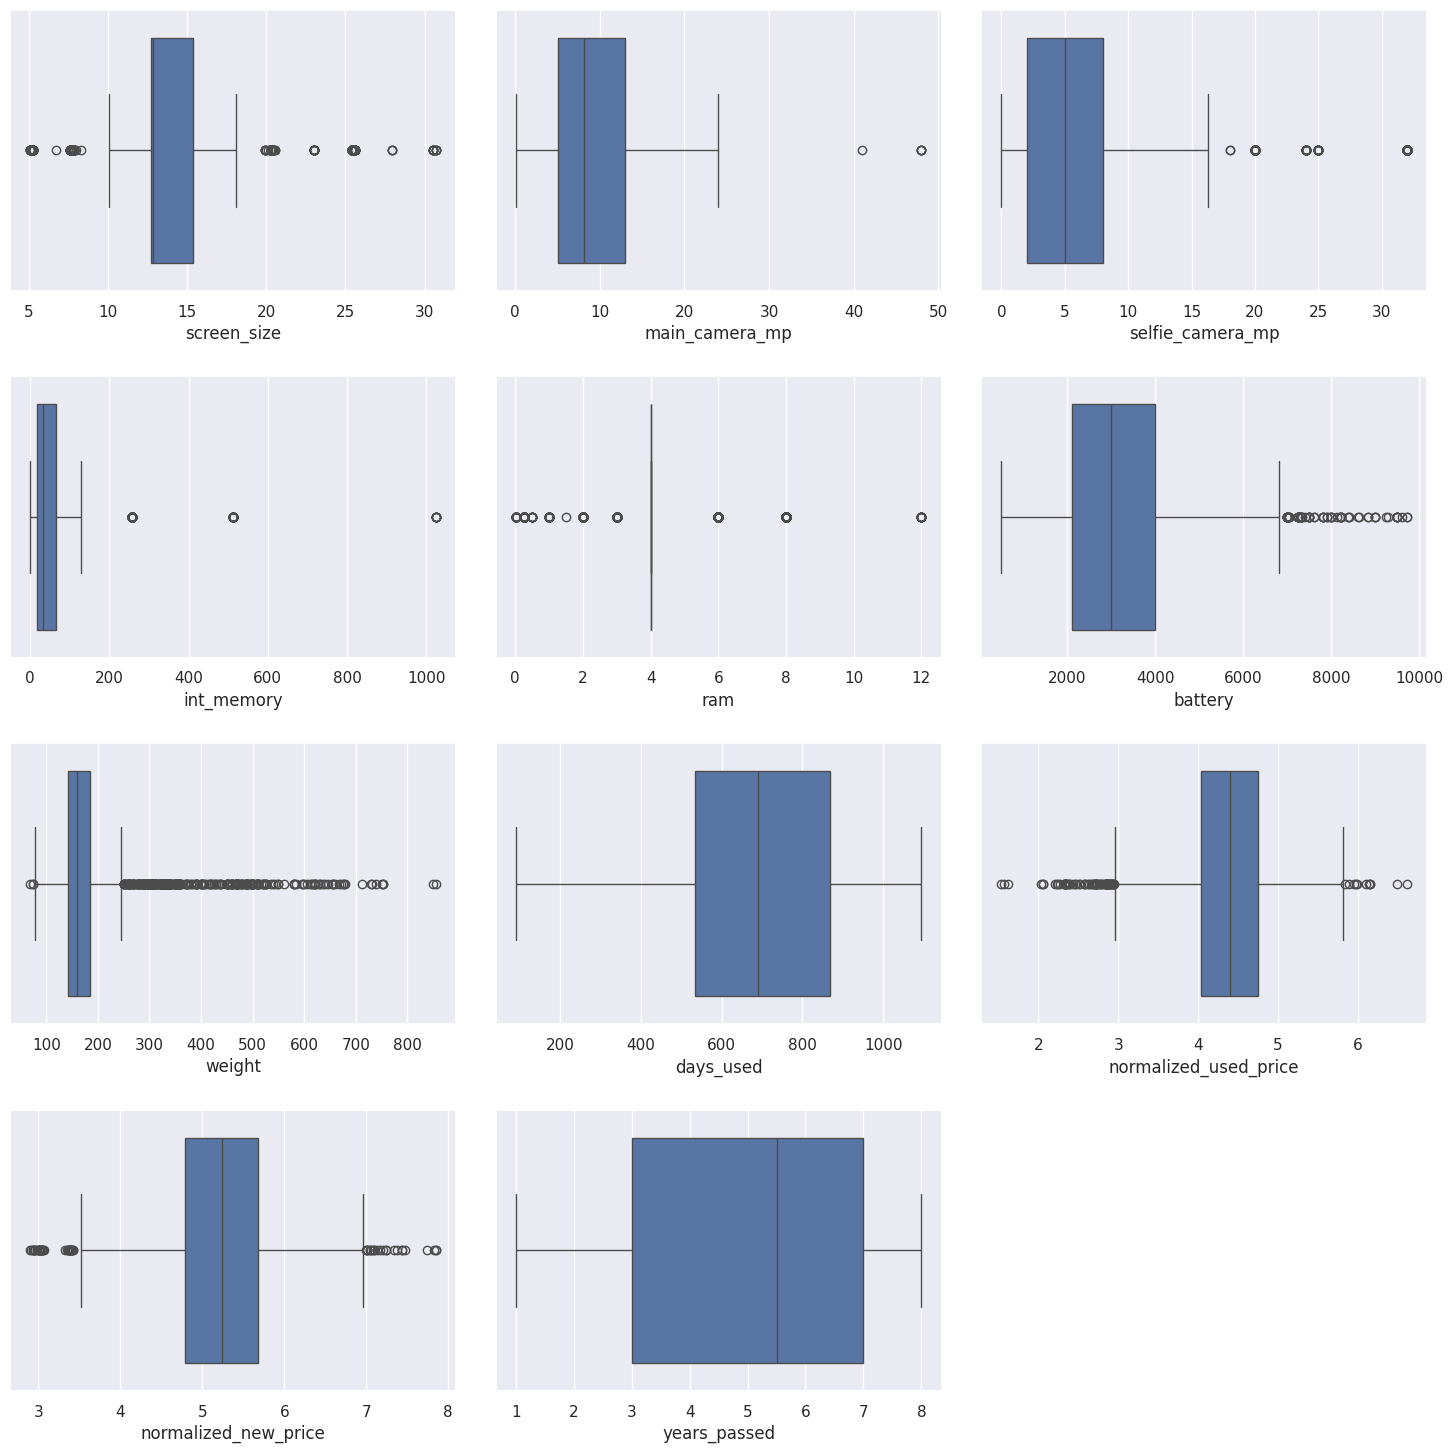

In [ ]:
#detect outliers
numeric_col = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize=(15,15))

for i, predictor in enumerate(numeric_col):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data=df, x=predictor)
  plt.tight_layout(pad=2)

- Weight and battery and screen size appear to have the most outliers. As noted before, this may be due to the existence of both tablets and phones in the data set.
- Outliers will not be treated due to the variablility among device type.

## EDA

- It is a good idea to explore the data once again after manipulating it.

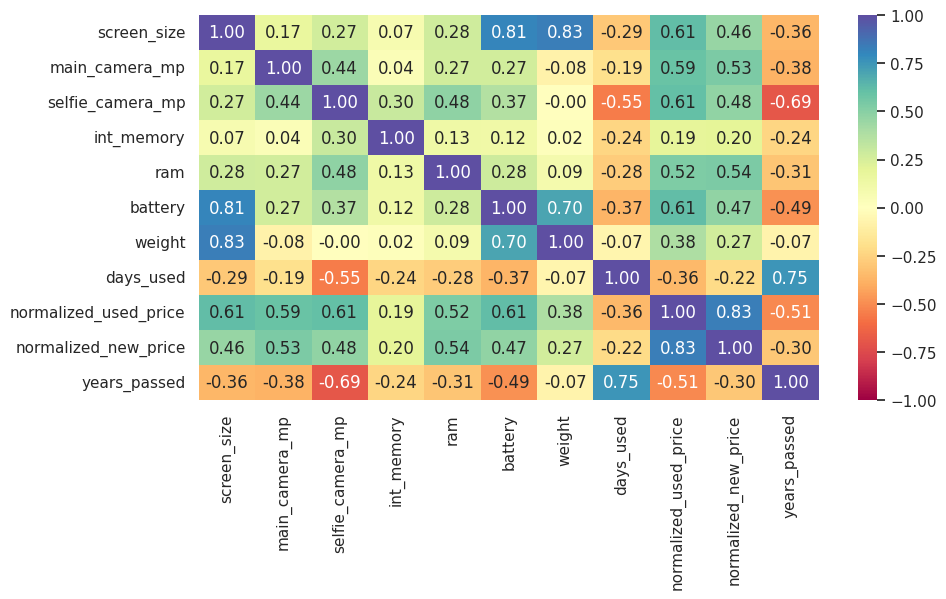

In [ ]:
#check heat map once more
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Spectral', vmin=-1, vmax=1)
plt.show()

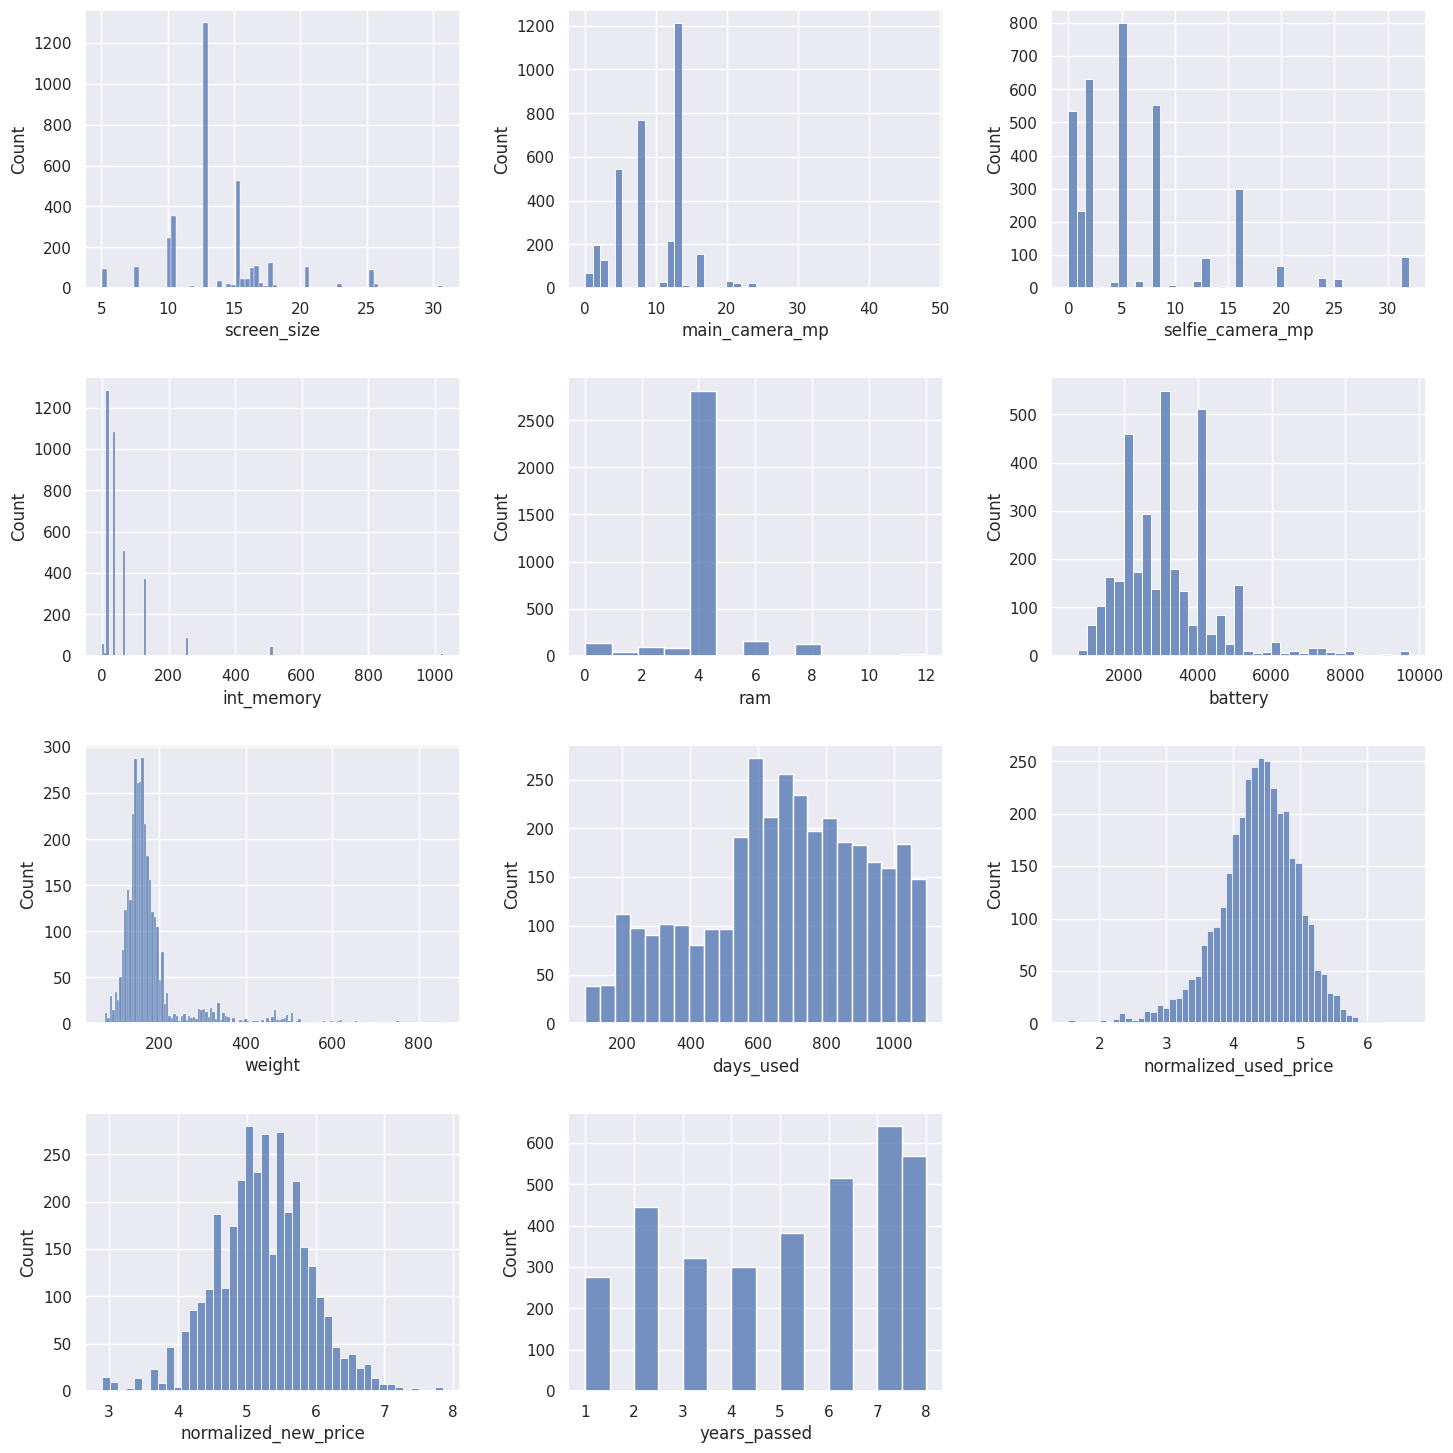

In [ ]:
#create histogram for numerical data
numeric_col = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize=(15,15))

for i, predictor in enumerate(numeric_col):
  plt.subplot(4, 3, i+1)
  sns.histplot(data=df, x=predictor)
  plt.tight_layout(pad=2)

- No significant changes have occurred among linear relationships.
- No significant changes have occurred in the distribution of the manipulated variables.

## Model Building - Linear Regression

### **Data Preparation for Modeling**

- Our goal is to predict the normalized used price of a device and determine which features have the most influence on it.
- We will use one hot encoding to create dummy variables for categorical features and add a constant.
- We will also split the data into a train and test sets so that we can later evaluate our model.

###**Split the dataset into independent and dependent variables**


In [ ]:
#generate an ols model, take in parameters: target, columns to drop

In [ ]:
#separate independent and dependent variables
X = df.drop(['normalized_used_price'], axis=1)
y= df['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_passed  
0              4.715100             1  
1              5.519018             1  
2              5.884631             1  
3              5.630961             1  
4     

In [ ]:
#add a constant
X = sm.add_constant(X)

In [ ]:
#create dummy variables for categorical features; drop first in alphabetical order
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#convert Boolean entries into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#split data in 70:30 ratio for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print('Number of rows in train data = ', X_train.shape[0])
print('Number of rows in test data = ', X_test.shape[0])

Number of rows in train data =  2417
Number of rows in test data =  1037


###**Model Building - Linear Regression**


In [ ]:
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                           23:35:22   Log-Likelihood:                 123.95
No. Observations:                   2417   AIC:                            -149.9
Df Residuals:                       2368   BIC:                             133.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- It is observed that all p-values for one hot encoded variables "brand_name" are above 0.05. This indicates that this is an insignificant predictor so we will drop the entire category at once.
- The values for adjusted $R^2$  and $R^2$ are 0.842 and 0.845 respectively. These are pretty good values and would otherwise indicate a good fit.
- Let us drop the predictor "brand_name" as a whole and check the summary.

####**Drop "brand_name" and rerun model**

In [ ]:
#drop all one hot encoded variables for "brand_name"

#create a list of one hot encoded variables for brand_name
brand_cols = [col for col in X.columns if col.startswith('brand_name')] #reference X

#drop brand_cols from X_train
X_train1 = X_train.drop(brand_cols, axis=1)

#drop brand_cols from X_test
X_test1 = X_test.drop(brand_cols, axis=1)

#rerun model
olsmod1 = sm.OLS(y_train, X_train1).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     851.7
Date:                   Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                           23:35:22   Log-Likelihood:                 100.03
No. Observations:                   2417   AIC:                            -168.1
Df Residuals:                       2401   BIC:                            -75.41
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

After dropping the category "brand_name":
- The adjusted $R^2$ decreased by 0.01, but generally stayed the same.
- It is observed that p-values that were originally high have decreased by some degree.
- We fill further investigate the performance of the model using various metrics.

## Model Performance Check

- We will evaluate model performance using $R^2$, adjusted $R^2$, RMSE, MAE and MAPE.
- We will define a function that will calculate these values simultaneously.

In [ ]:
#create a function to calculate mape
def mape_val(target, predictions):
    return np.mean(np.abs((target - predictions) / target)) * 100

#create a function that will return MAPE, RMSE, MAE, Adjusted R Squared and R Squared
def model_performance(model, predictors, target):
    predicted = model.predict(predictors) #predict allows you to use test or train set

    #calculate evaluation metrics
    r2 = model.rsquared
    adjr2 = model.rsquared_adj
    rmse = np.sqrt(mean_squared_error(target, predicted))
    mae = mean_absolute_error(target, predicted)
    mape = mape_val(target, predicted)

    #create a data frame with evaluation metrics
    df_perf = pd.DataFrame(
        {
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
        },
        index=[0],
    )

    return df_perf

####**Now we will compare model performance on train and test sets respectively.**

In [ ]:
#Model performance on train set
print('Train performance of olsmod1')
train_perf_olsmod1 = model_performance(olsmod1, X_train1, y_train)
print(train_perf_olsmod1)
print('-' * 60)

#Model performance on test set
print('Test performance of olsmod1')
test_perf_olsmod1 = model_performance(olsmod1, X_test1, y_test)
print(test_perf_olsmod1)

Train performance of olsmod1
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.841798        0.840809  0.232161  0.182066  4.372491
------------------------------------------------------------
Test performance of olsmod1
   R-squared  Adj. R-squared      RMSE       MAE     MAPE
0   0.841798        0.840809  0.236505  0.182925  4.46523


- Values for the train set and the test set are almost exact, with the exception of the MAPE.
- The MAPE increased by nearly .1% for the test set.
- The adjusted $R^2$ is a good value at 0.84.
- The model does a decent job capturing the data for the time being.
- We will now check the linear assumptions.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

The linear assumptions to be checked include:


1.   No multicollinearity among predictors
2.   Linearity of independent and dependent variables
3. Independence of residuals
4. Normality of residuals
5. Homoscedasticity of residuals

**In this section, we will:**
1. Test for multicollinearity
- We will check the variation inflation factors to detect multicollinearity.
- We will define 2 functions to assess this:
  - One function will calculate VIFs for all variables
  - The other will detect VIFs > 5 to detect multicollinearity
-General rule of thumb:
  - If VIF is between 1 and 5, then there is low multicollinearity.
  - If VIF is between 5 and 10, we say there is moderate multicollinearity.
  - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
#import vif function
from statsmodels.stats.outliers_influence import variance_inflation_factor

#user defined function to calculate vif
def calc_vif(predictors):
  vif_data = pd.DataFrame()

  #retrieve column names
  vif_data['Variable'] = predictors.columns

  #calculate vif
  vif_data['VIF'] = [
      variance_inflation_factor(predictors.values, i)
      for i in range(predictors.shape[1])
  ]

  return vif_data

#define a function that will detect high VIFs > 5
def high_vif(predictors): #predictors = independent variables
  vif_data = calc_vif(predictors)
  filtered_vif = vif_data[vif_data['VIF'] > 5]
  print('VIFs over 5:')
  print(filtered_vif)

####**Check VIFs for olsmod1**

In [ ]:
#show all vifs for olsmod1
print('All VIFs for olsmod1:')
print(calc_vif(X_train1))
print('-' * 40)

#show vifs > 5 for olsmod1
high_vif(X_train1)

All VIFs for olsmod1:
                Variable         VIF
0                  const  123.952876
1            screen_size    7.245135
2         main_camera_mp    2.000847
3       selfie_camera_mp    2.577415
4             int_memory    1.247902
5                    ram    2.123738
6                battery    3.855296
7                 weight    6.135966
8              days_used    2.576594
9   normalized_new_price    2.624114
10          years_passed    4.628813
11             os_Others    1.487138
12            os_Windows    1.023358
13                os_iOS    1.089092
14                4g_yes    2.259799
15                5g_yes    1.722938
----------------------------------------
VIFs over 5:
      Variable         VIF
0        const  123.952876
1  screen_size    7.245135
7       weight    6.135966


- It is observed that "screen_size" and "weight" have VIFs over 5.
- We will assess which variable is more beneficial to drop by evaluating the performance metrics previously used.
- Let us create a user defined function to help with this process.

In [ ]:
#define a function that will compare model performance on the train set after dropping high VIF predictors
#this only works for modifying X_train1 set

def compare_performance_after_drop(high_vif_cols):
    for col in high_vif_cols:
      temp_X_train = X_train1.drop([col], axis = 1) #drop high VIF column

      temp_olsmod = sm.OLS(y_train, temp_X_train).fit()#build ols model

      #check performance parameters on train set
      temp_performance = model_performance(temp_olsmod, temp_X_train, y_train)

      print(f"Performance on Train Set After Dropping '{col}'")
      print(temp_performance) #print performance
      print()
      print(high_vif(temp_X_train)) #print high vifs
      print("-" * 60)

In [ ]:
#drop "screen_size" and "weight" and check performance
col_to_drop = ['screen_size', 'weight']
compare_performance_after_drop(col_to_drop)

Performance on Train Set After Dropping 'screen_size'
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.837959        0.837014  0.234961  0.183595  4.418327

VIFs over 5:
  Variable         VIF
0    const  103.713443
None
------------------------------------------------------------
Performance on Train Set After Dropping 'weight'
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0    0.83834        0.837397  0.234685  0.183829  4.413818

VIFs over 5:
  Variable         VIF
0    const  107.131816
None
------------------------------------------------------------


- Dropping the predictor "weight" is more beneficial since it will give us a slightly higher adjusted $R^2$ value and a slightly lower MAPE, than if we dropped "screen_size."
- Doing so will also eliminate VIFs over 5.
- We will drop "weight" and rerun the model.

In [ ]:
#drop weight and rerun the model
X_train2 = X_train1.drop(['weight'], axis=1)
X_test2 = X_test1.drop(['weight'], axis=1)

olsmod2 = sm.OLS(y_train, X_train2).fit()
calc_vif(X_train2)

,Variable,VIF
0,const,107.131816
1,screen_size,3.405817
2,main_camera_mp,1.904896
3,selfie_camera_mp,2.543813
4,int_memory,1.247535
5,ram,2.119812
6,battery,3.471766
7,days_used,2.563611
8,normalized_new_price,2.617734
9,years_passed,4.468420


- There are no variables with VIFs over 5, therefore multicollinearity has been treated.
- We will now review the updated summary for olsmod2.

In [ ]:
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     889.7
Date:                   Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                           23:35:23   Log-Likelihood:                 73.898
No. Observations:                   2417   AIC:                            -117.8
Df Residuals:                       2402   BIC:                            -30.94
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Interpretation of regression model olsmod2:**
- The adjusted $R^2$ value went from ~0.841 to ~0.837. The decrease by 0.004 confirms that the dropped variable 'weight' was insignificant to the model.
- It is observed that 6 variables have p-values over 0.05, indicating insignificance on our regression model. We will treat high p-values next.

**Dealing with high p-value variables**

- As stated previously, 6 predictors have high p-values, indicating that they do not add value to our ols model.
- We will use a loop to systematically remove these features.
- The said loop will execute the following:
  - It will generate an ols model, using the current train set.
  - It will detect the feature with the maximum p-value.
  - If the p-value > 0.05, the feature will be removed from the initial list of features.

- The previous steps will be repeated until there are no longer features with p-values over 0.05.

- Once this happens, a list will be generated containing only features that shall be kept in the next run of the model.

In [ ]:
# returns features to be kept, after removing those with high p-values

#make copy of X_train2
predictors = X_train2.copy()

# create an initial list of existing columns
cols = predictors.columns.tolist()


while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues #BUILT IN FUNCTION
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_max_p = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_max_p)
    else:
        break

cols_to_keep = cols
print('Features to keep: ',cols_to_keep)

Features to keep:  ['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_passed', '4g_yes']


####**We will re-generate an ols model with updated features**

In [ ]:
#modify features for test and train set
X_train3 = X_train2[cols_to_keep]
X_test3 = X_test2[cols_to_keep]

#generate ols model
olsmod3 = sm.OLS(y_train, X_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1557.
Date:                   Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                           23:35:23   Log-Likelihood:                 71.431
No. Observations:                   2417   AIC:                            -124.9
Df Residuals:                       2408   BIC:                            -72.75
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#olsmod3 performance on train set
print('Train performance of olsmod3')
train_perf_olsmod3 = model_performance(olsmod3, X_train3, y_train)
print(train_perf_olsmod3)
print('-' * 60)

#olsmod3 performance on test set
print('Test performance of olsmod3')
test_perf_olsmod3 = model_performance(olsmod3, X_test3, y_test)
print(test_perf_olsmod3)

Train performance of olsmod3
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.838009        0.837471  0.234924  0.184075  4.415482
------------------------------------------------------------
Test performance of olsmod3
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.838009        0.837471  0.238612  0.184301  4.490726


- We observe that all p-values are below 0.05. Thus, the features we have will be part of the final model.
- The adjusted $R^2$ value tells us that our model can explain ~84% of the variance in the target variable, relative to the number of predictors used.
- RMSE and MAE are almost identical for train and test sets, indicating that the model is not overfitting.
- MAPE is only slightly higher in the test set, which is okay.

**Now we will check the rest of the linear assumptions on olsmod3.**

2. Linearity of independent and dependent variables

3. Independence of residuals

4. Normality of residuals

5. Homoscedasticity of residuals

**In this section, we will check for:**
  2. Linearity of variables
  3. Independence of residuals
- We will do so by plotting fitted values against residuals.
- If there is no pattern between the two, then we conclude that the model is linear and residuals are independent.


In [ ]:
#create a dataframe with actual, fitted and residual values
result_df = pd.DataFrame({
    'Actual': y_train, #actual values
    'Fitted': olsmod3.fittedvalues, #predicted values of the train set
    'Residuals': olsmod3.resid #fitted - actual
})

result_df.head()

,Actual,Fitted,Residuals
3026,4.087488,3.865209,0.222279
1525,4.448399,4.571355,-0.122956
1128,4.315353,4.284885,0.030467
3003,4.282068,4.258699,0.023369
2907,4.456438,4.450435,0.006003


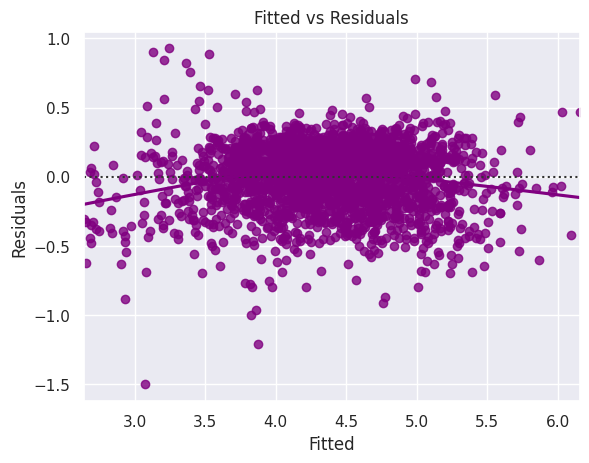

In [ ]:
#generate a residual plot to detect any patterns
sns.residplot(data=result_df, x='Fitted', y='Residuals', color='purple', lowess=True )
plt.title('Fitted vs Residuals');

- No patterns are detected in the residual plot.
- Therefore, we can conclude that the model is linear and the residuals are independent.
- The curve in the residual plot is close to the horizontal line, which indicates a good fit.

**Now we will check the following assumption:**

4. Normality of residuals

- We will initially check for normality by using the Shapiro-Wilk test.
    - If the p-value < 0.05, then the null hypothesis is rejected and we conclude that the distribution is **not** normal.
    - If the p-value >= 0.05, then the null hypothesis is accepted and we conclude that the distribution is normal.

In [ ]:
#Shapiro-Wilk test for normality of residuals
stats.shapiro(result_df["Residuals"])

ShapiroResult(statistic=0.9713910488866934, pvalue=1.439804884840552e-21)

- Given that the p-value for the Shapiro-Wilk test is below 0.05, we must reject the null hypothesis and conclude that the distribution is not normal.
- Let us investigate the distribution via a histogram and generate a Q-Q plot to see how far off it is.

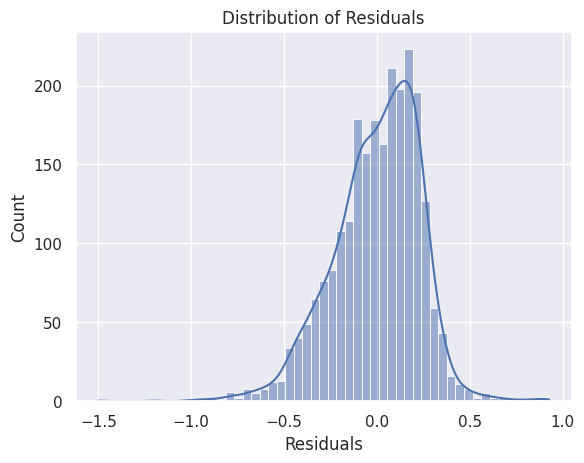

In [ ]:
#distribution of residuals
sns.histplot(data=result_df, x='Residuals', kde=True)
plt.title('Distribution of Residuals');

- The distribution of residuals is slightly left skewed.
- Let us generate a Q-Q plot that uses the line of best fit as a reference line. This allows for more flexibility since the line is tailored to the actual distribution of the residuals.

**Q-Q plot that uses the line of best fit as a reference line.**

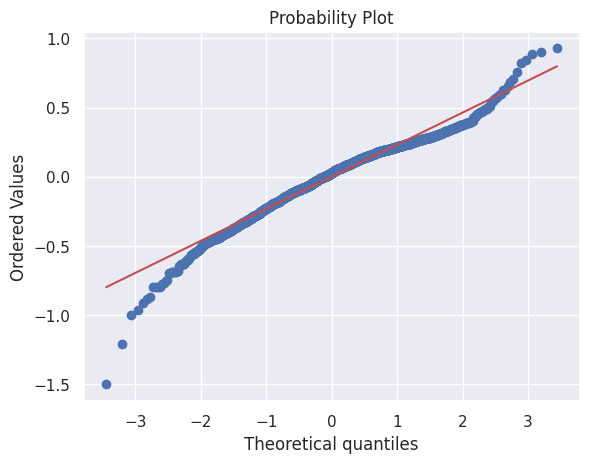

In [ ]:
#Generate a Q-Q plot that uses the line of best fit as a reference to normality
import pylab

stats.probplot(result_df["Residuals"], dist="norm", plot=pylab);

- It is concluded that although the residuals do not follow a perfectly normal distribution, it aligns well enough with the line of best fit.
- Therefore, we can say that the residuals are normally distributed.

**Finally, we will check:**

5. Homoscedasticity of residuals

- To satisfy the assumption of homoscedasticity, there must be equal variance among the residuals.
- We will confirm this by using the `sms.het_goldfeldquandt()` statistical test.
  - If the p-value < 0.05, we reject the null hypothesis and conclude that the residuals are heteroscedastic.
  - If the p-value >= 0.05, we accept the null hypothesis and conclude that residuals are homoscedastic.

In [ ]:
import statsmodels.stats.api as sms

test_statistic, p_value, hypothesis = sms.het_goldfeldquandt(result_df['Residuals'], X_train3)
print(f'Goldfeld-Quandt Test Statistic: {test_statistic: .3f}')
print(f'P-value: {p_value: .3f}')

Goldfeld-Quandt Test Statistic:  1.066
P-value:  0.135


- Given that our p-value is greater than 0.05, we support the null hypothesis and conclude that the residuals are homoscedastic.
- All assumptions are now satisfied.

####**Predictions on Test Data**
- Now, we will use our model to make predictions on our test data and compare to the actual values.

In [ ]:
#take x values from test set and make predictions
test_predictions = olsmod3.predict(X_test3)

#create a dataframe that will compare test predictions to actual y values
comparison_df = pd.DataFrame({
    'Predicted': test_predictions,
    'Actual': y_test
})

comparison_df.sample(10, random_state=1)

,Predicted,Actual
1995,4.377920,4.566741
2341,3.961385,3.696103
1913,3.766670,3.592093
688,4.104059,4.306495
650,5.122770,4.522115
2291,4.398304,4.259294
40,5.409263,4.997685
1884,4.111427,3.875359
2538,4.049692,4.206631
45,5.307504,5.380450


- Our model appears to perform very well on unseen data. The values for actual and predicted output are very similar.

## Final Model

- Let us re-generate the model and summary of our OLS model for final review.

In [ ]:
#make copies of current test and train sets
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

#regenerate final model
olsmod_final = sm.OLS(y_train, X_train_final).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1557.
Date:                   Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                           23:35:25   Log-Likelihood:                 71.431
No. Observations:                   2417   AIC:                            -124.9
Df Residuals:                       2408   BIC:                            -72.75
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Final comparison of test and train set.**

In [ ]:
#Final performance on train set
print('Train Performance of Final OLS Model')
train_perf_olsmod_final = model_performance(olsmod_final, X_train_final, y_train)
print(train_perf_olsmod_final)
print('-' * 60)

#Final performance on test set
print('Test Performance of Final OLS Model')
test_perf_olsmod_final = model_performance(olsmod_final, X_test_final, y_test)
print(test_perf_olsmod_final)

Train Performance of Final OLS Model
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.838009        0.837471  0.234924  0.184075  4.415482
------------------------------------------------------------
Test Performance of Final OLS Model
   R-squared  Adj. R-squared      RMSE       MAE      MAPE
0   0.838009        0.837471  0.238612  0.184301  4.490726


**Cross Validation for Test and Train Set**
- Our final model can explain ~84% of the data.
- The MAPE is low for both sets and is only slightly higher for the test set. The error percentage is very reasonable.
- RMSE and MAE are also low for both sets and have almost identical values. This indicates our model generalized well for the new data.
- All performance measures are very close across the test and train set. This indicates a good fit.

## Actionable Insights and Recommendations

####**Observations**
1.   The final model can explain ~ 84% of the variance in the dependent variable with a ~ 4.9% error on the test set.
  - This indicates a good fit.
2. After evaluating the correlation coefficients given in parenthesis, the following predictors appeared to have a positive linear relationship with normalized used price of devices:
  - Screen_size (0.61), main camera mp (0.59), selfie camera mp (0.61) and normalized new price(0.83)
3. The normalized used price will increase by 0.0432 each time screen size is increased by one cm, all other variables held constant.
4. For each unit increase in main camera, our used price will increase by 0.0189 units, all other variables held constant.
5. For each unit increase in selfie camera quality, our used price will increase by 0.0133 units, all other variables held constant.
6. As the normalized new price increases by one unit, the used price increases by 0.426 units, all other variables held constant.
7. If the number of years passed increases by one unit, than the normalized used price will decrease by -0.0192 units.
8. The normalized used price would be 0.036 units higher for a device that has 4g network availability, than a device that does not, holding all other variables constant.
9. Days used seems to have little effect on the normalized used price.

####**Actionable Recommendations:**
1. Invest in devices that have larger screen sizes to increase profit.
2. Add more devices with high main camera quality to the inventory to increase profit.
3. Bring in more devices with high selfie camera quality to increase profit.
4. Investing in devices that are newer and have a higher new price can help with business.
5. Since 4g availability adds value to the used price of a device, make efforts to ensure that it is available on devices.
6. Have separate datasets for phones and tablets for better precision on predicting a used price.


___